<a href="https://colab.research.google.com/github/PeterDeJin/log_return/blob/main/log_return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import cvxpy as cp
import numpy as np

# 選擇2022年12月S&P500前實權中的股票 資料來源 https://www.mitrade.com/zh/insights/indices/US-index/sp500-index
tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
# FB = META
# BRK.B = BRK-B
start_date = '2023-01-01'
end_date = '2024-01-01'
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
daily_returns = data.pct_change().fillna(method='ffill')

for i in range(10):
    daily_returns.values.T[i]
#print (daily_returns.values.T[0])
#print (daily_returns.values)

daily_return_value = [0]*len(daily_returns)
daily_return_result = [0]*len(daily_returns)

M = 0.8
x = cp.Variable(10)

for i in range (1,len(daily_returns)):
  constraints = [cp.sum(x) == 1, x >= 0.00000001, x <= M ]
  objective = cp.Minimize( -cp.log( 1 + daily_returns.values[i] @ x ) )
  prob = cp.Problem(objective, constraints)
  result = prob.solve()
  daily_return_value[i] = x.value
  daily_return_result[i] = result

max_index = [0]*len(daily_returns)
max2_index = [0]*len(daily_returns)
for i in range (1,len(daily_returns)):
  max_index[i] = np.argmax(daily_return_value[i])
  max2_index[i] = np.argsort(daily_return_value[i])[-2]

daily_return_state = 0
for t in range(1,len(daily_returns)):
  for j in range(10):
   if (daily_returns.values[t][np.argmax(daily_return_value[t])]-daily_returns.values[t][j])/(1+daily_return_value[t] @ daily_returns.values[t]) < 0:
     print(t,j)
     daily_return_state = 1
     break
for t in range(1,len(daily_returns)):
  for j in range(10) :
    if j == np.argmax(daily_return_value[t]):
      continue
    if (daily_returns.values[t][np.argsort(daily_return_value[t])[-2]]-daily_returns.values[t][j])/(1+daily_return_value[t] @ daily_returns.values[t]) < 0:
      print(t,j)
      daily_return_state = 1
      break
if (daily_return_state == 0):
  print("finish and correct")

for t in range(1,len(daily_returns)):
  if max_index[t] != np.argmax(daily_returns.values[t]):
    print(t,max_index[t],np.argmax(daily_returns.values[t]))
  if max2_index[t] != np.argsort(daily_returns.values[t])[-2]:
    print(t,max2_index[t],np.argsort(daily_return_value[t])[-2])





[*********************100%***********************]  10 of 10 completed
<ipython-input-15-200146eb65cd>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returns = data.pct_change().fillna(method='ffill')


[            nan  1.03141986e-02 -1.06046861e-02  3.67942854e-02
  4.08882287e-03  4.45643125e-03  2.11122175e-02 -5.99407907e-04
  1.01191557e-02  8.75631762e-03 -5.36984566e-03  4.43694739e-04
  1.92207120e-02  2.35004957e-02  1.00628524e-02 -4.70065894e-03
  1.48033020e-02  1.36843638e-02 -2.00780913e-02  9.02090351e-03
  7.90087358e-03  3.70625414e-02  2.43998136e-02 -1.79287817e-02
  1.92446079e-02 -1.76525471e-02 -6.91167197e-03  2.45628331e-03
  1.88067496e-02 -4.22490286e-03  1.39033790e-02 -1.04294417e-02
 -7.54673903e-03 -2.66796136e-02  2.89606162e-03  3.29047485e-03
 -1.80052659e-02  8.24739199e-03 -3.44775925e-03 -1.42460418e-02
  4.12913640e-03  3.50900880e-02  1.85393081e-02 -1.44963642e-02
  8.37729891e-03 -1.49146509e-02 -1.38787262e-02  1.32659689e-02
  1.40891970e-02  2.62132378e-03  1.86941319e-02 -5.45398066e-03
  1.54838947e-02  1.19440883e-02 -9.10341698e-03  6.96953029e-03
  8.30541509e-03 -1.22932700e-02 -3.98034410e-03  1.97907368e-02
  9.88991185e-03  1.56442

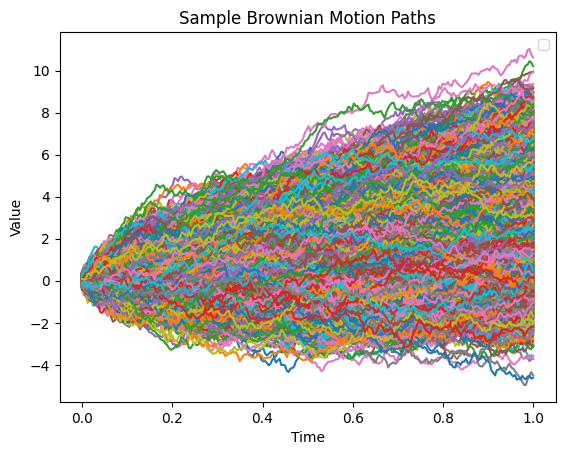

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)
n = 250
num_paths = 10000
T = 1.0
dt = T / n
t = np.linspace(0, T, n)
mean = 3.0
std_dev = 2.0

paths = np.zeros((num_paths, n))
for i in range(num_paths):
    dW = mean * dt + std_dev * np.sqrt(dt) * np.random.randn(n)
    paths[i, :] = np.cumsum(dW)

for i in range(num_paths):
  plt.plot(t, paths[i])
plt.title('Sample Brownian Motion Paths')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

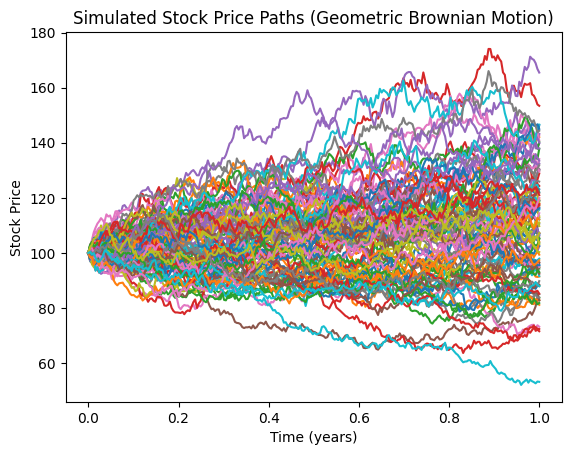

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)
n = 250
num_paths = 10000
T = 1.0
dt = T / n
t = np.linspace(0, T, n)

mean = 0.1
std_dev = 0.2

paths = np.zeros((num_paths, n))
paths[:, 0] = 100

for i in range(num_paths):
    for j in range(1, n):
        dW = np.random.randn() * np.sqrt(dt)
        paths[i, j] = paths[i, j-1] * np.exp((mean - 0.5 * std_dev**2) * dt + std_dev * dW)

for i in range(100):
    plt.plot(t, paths[i])
plt.title('Sample Brownian Motion Paths')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()


In [ ]:
def brownian(mean, std_dev, n = 250, num_paths = 10000, time = 10):
    np.random.seed(66)
    T = 1.0
    dt = T / n
    t = np.linspace(0, T, n)
    paths = np.zeros((num_paths, n))
    predict_return = 0
    for i in range(num_paths):
        dW = mean * dt + std_dev * np.sqrt(dt) * np.random.randn(n)
        paths[i, :] = np.cumsum(dW)
        for j in range(time):
            predict_return += (paths[i,j+1]-paths[i,j])/paths[i,j]
    predict_return = predict_return/num_paths
    return predict_return

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(brownian(0.5,1.0))
# 數字偏大？？

2.3861188478225297


In [ ]:
import yfinance as yf
import numpy as np

# 設定股票代碼與日期範圍
tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
start_date = '2023-01-01'
end_date = '2024-01-03'
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
daily_returns = data.pct_change().fillna(method='ffill')

transposed_returns = daily_returns.values.T

group_size = 10

means = []
variances = []

for i in range(1, transposed_returns.shape[1], group_size):
    group = transposed_returns[:, i:i+group_size]
    group_mean = np.mean(group, axis=1)
    group_var = np.var(group, axis=1)
    means.append(group_mean)
    variances.append(group_var)

means = np.array(means)
variances = np.array(variances)
# print("每組均值 (每組10行):")
# print(means)
# print("\n每組方差 (每組10行):")
# print(variances)
# print("transposed_returns:")
# a = [0]*10
# for i in range (241,250):
#     a += (daily_returns.values[i])
# a = a/9
# print(a)
# print(means[24])
print(len(data.values))
# 總共25筆平均 其中最後一筆只有拿9天做平均

[*********************100%***********************]  10 of 10 completed


251


<ipython-input-30-20b2763de7eb>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returns = data.pct_change().fillna(method='ffill')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

predict_return = []
for j in range(len(means)):
    for i in range(10):
        predict_return.append(brownian(means[j][i],variances[j][i]))
predict_return = np.array(predict_return)
predict_return = predict_return.reshape(len(means),10)
print(predict_return)
print(len(predict_return))

[[ 8.99869319e-01  8.98596831e-01 -8.64189666e-01  8.91202400e-01
   8.89372146e-01  9.00196818e-01  6.73664080e-01  8.99809915e-01
   1.67891073e+00  8.99828152e-01]
 [ 8.99845203e-01  8.99818871e-01  9.18858552e-01  9.21499537e-01
   9.05485429e-01  9.00293004e-01 -1.26207795e+00  8.99813547e-01
   8.76900732e-01  8.99806849e-01]
 [ 8.99812194e-01  1.01921441e+00  8.99806596e-01  1.16107022e+00
   1.05346927e+00  9.37919870e-01  8.99820483e-01  9.14410070e-01
   8.99806590e-01  7.41834473e-01]
 [ 9.02603306e-01  9.08594558e-01  9.00374174e-01  9.00385890e-01
   9.00423557e-01  9.00320007e-01  8.26378513e-01  9.17764219e-01
   9.01210395e-01  9.00160090e-01]
 [ 1.43693758e+00  9.00353813e-01  3.53565772e-01  8.50864893e-01
   1.26429844e+00  9.00229852e-01  1.11089640e+00  9.22865840e-01
   1.56873257e+00  1.29650567e+00]
 [ 8.99866178e-01  8.98311726e-01  9.30979410e-01  8.99830366e-01
   8.99832930e-01  1.48093685e+00  1.33867638e+00  8.33952884e-01
   8.99814044e-01  1.00496024e+00

In [ ]:
print(predict_return[3])

[0.90260331 0.90859456 0.90037417 0.90038589 0.90042356 0.90032001
 0.82637851 0.91776422 0.9012104  0.90016009]


In [ ]:
def brownian(mean, std_dev, n, size, num_paths = 10000):
    np.random.seed(42)
    T = 1.0
    dt = T / n
    t = np.linspace(0, T, n)
    paths = np.zeros((num_paths, n))
    predict_return = 0
    for i in range(num_paths):
        dW = mean * dt + std_dev * np.sqrt(dt) * np.random.randn(n)
        paths[i, :] = np.cumsum(dW)
        predict_return += (paths[i,size-1]-paths[i,0])/paths[i,size-1]
    predict_return = predict_return/num_paths
    return predict_return

import yfinance as yf
import pandas as pd
import cvxpy as cp
import numpy as np

# 選擇2022年12月S&P500前實權中的股票 資料來源 https://www.mitrade.com/zh/insights/indices/US-index/sp500-index
tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
# FB = META
# BRK.B = BRK-B
start_date = '2023-01-01'
end_date = '2024-01-01'
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
daily_returnss = data.pct_change().fillna(method='ffill')
transposed_returns = daily_returnss.values.T

#以多少天為一組
group_size = 20
means = []
variances = []

for i in range(1, transposed_returns.shape[1], group_size-1):
    group = transposed_returns[:, i:i+group_size]
    group_mean = np.mean(group, axis=1)
    group_var = np.var(group, axis=1)
    means.append(group_mean)
    variances.append(group_var)

means = np.array(means)
variances = np.array(variances)

predict_return = []
for j in range(len(means)):
    for i in range(len(tickers)):
        predict_return.append(brownian(means[j][i], variances[j][i], len(data.values), group_size))
predict_return = np.array(predict_return)
predict_return = predict_return.reshape(len(means),len(tickers))

daily_returns = predict_return

daily_return_value = [0]*len(daily_returns)
daily_return_result = [0]*len(daily_returns)

M = 0.8
x = cp.Variable(len(tickers))

for i in range (1,len(daily_returns)):
  constraints = [cp.sum(x) == 1, x >= 0.00000001, x <= M ]
  objective = cp.Minimize( -cp.log( 1 + daily_returns[i] @ x ) )
  prob = cp.Problem(objective, constraints)
  result = prob.solve()
  daily_return_value[i] = x.value
  daily_return_result[i] = result

max_index = [0]*len(daily_returns)
max2_index = [0]*len(daily_returns)
for i in range (1,len(daily_returns)):
  max_index[i] = np.argmax(daily_return_value[i])
  max2_index[i] = np.argsort(daily_return_value[i])[-2]

daily_return_state = 0
for t in range(1,len(daily_returns)):
  for j in range(len(tickers)):
   if (daily_returns[t][np.argmax(daily_return_value[t])]-daily_returns[t][j])/(1+daily_return_value[t] @ daily_returns[t]) < 0:
     print(t,j)
     print(daily_returns[t][np.argmax(daily_return_value[t])],daily_returns[t][j],1+daily_return_value[t] @ daily_returns[t])
     daily_return_state = 1
     break
for t in range(1,len(daily_returns)):
  for j in range(len(tickers)) :
    if j == np.argmax(daily_return_value[t]):
      continue
    if (daily_returns[t][np.argsort(daily_return_value[t])[-2]]-daily_returns[t][j])/(1+daily_return_value[t] @ daily_returns[t]) < 0:
      print(t,j)
      daily_return_state = 1
      break
if (daily_return_state == 0):
  print("finish and correct")

for t in range(1,len(daily_returns)):
  if max_index[t] != np.argmax(daily_returns[t]):
    print(t,max_index[t],np.argmax(daily_returns[t]))
  if max2_index[t] != np.argsort(daily_returns[t])[-2]:
    print(t,max2_index[t],np.argsort(daily_return_value[t])[-2])

[*********************100%***********************]  10 of 10 completed
<ipython-input-2-3d2807ac97d5>:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returnss = data.pct_change().fillna(method='ffill')


finish and correct


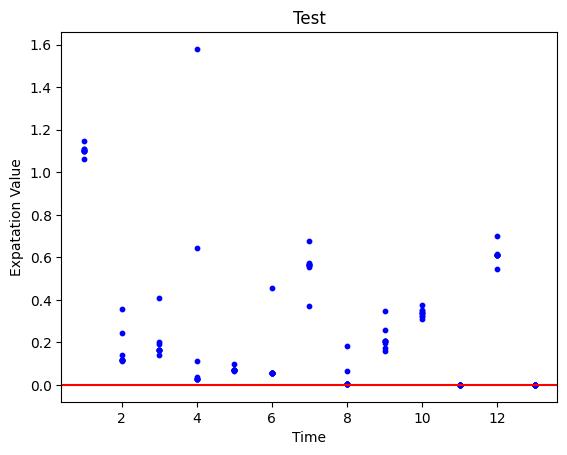

In [ ]:
import matplotlib.pyplot as plt

x_data = []
y_data = []

for t in range(1, len(daily_returns)):
    for j in range(len(tickers)):
        if j == np.argmax(daily_return_value[t]):
            continue
        x_data.append(t)
        y_value = (daily_returns[t][np.argmax(daily_return_value[t])] - daily_returns[t][j]) / (
            1 + daily_return_value[t] @ daily_returns[t]
        )
        y_data.append(y_value)

plt.scatter(x_data, y_data, c='blue', marker='o', s=10)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Test')
plt.xlabel('Time')
plt.ylabel('Expatation Value')
plt.show()


In [ ]:
# 檢查用
print(daily_return_result[2])
print(daily_returnss.values[2+1])
print(daily_return_value[2])
print(daily_return_result[2])
print(np.dot(daily_return_result[2], daily_returnss.values[2+1]))

-0.7436390728925149
[0.03679422 0.03561115 0.01850434 0.01601945 0.01322499 0.00810966
 0.01913559 0.0242635  0.01178534 0.0314527 ]
[9.48446624e-08 1.08328373e-08 5.99999993e-01 9.39234278e-08
 9.42096798e-08 2.00872780e-08 3.99999482e-01 1.03132483e-07
 9.48708774e-08 1.22503788e-08]
-0.7436390728925149
[-0.02736162 -0.02648184 -0.01376055 -0.01191269 -0.00983462 -0.00603066
 -0.01422997 -0.01804329 -0.00876404 -0.02338946]


[ 0.01031426 -0.00792356  0.01497204 -0.01103672 -0.01166969  0.01088722
  0.00932517  0.02108389 -0.04374325  0.02516986]
1.652379136717189
13


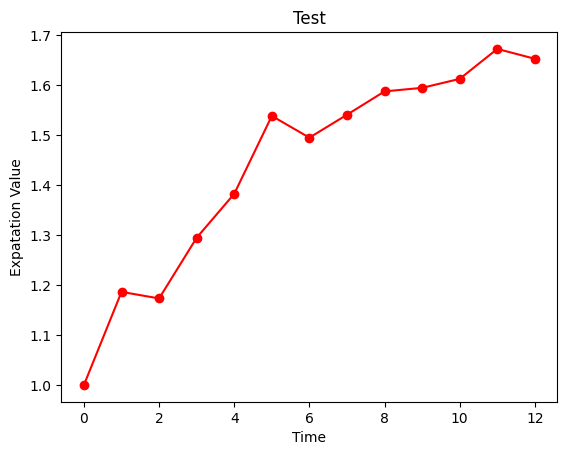

In [ ]:
import yfinance as yf
import pandas as pd
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

v_0 = 1
v = [1]
# print((daily_return_value[3]))
# print(daily_returnss.values[1])
# print(np.dot(daily_return_value[0], daily_returnss.values[1]))
for i in range(1,len(daily_return_value)-1):
      # print(daily_return_value[i])
      # print(daily_returnss.values[i+1])
      # print(np.dot(daily_return_result[i], daily_returnss.values[i+1]))
      R_n = [1] * len(tickers)
      for j in range(len(tickers)):
          for k in range((i-1)*group_size+1,i*group_size):
              R_n[j] = (1 + daily_returnss.values[k][j])*R_n[j]
              # print(R_n[j])
          R_n[j] = R_n[j] - 1
      v_1 = (1 +(np.dot(daily_return_value[i], R_n))) * v_0
      v.append(v_1)
      # print(v_1)
      v_0 = v_1
# print(v_1)
# print(len(v))
for i in range(len(v)):
    plt.plot(i,v[i], 'ro')
plt.plot(range(len(v)), v, 'r-')
plt.title('Test')
plt.xlabel('Time')
plt.ylabel('Expatation Value')
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

def brownian(mean, std_dev, n, size, num_paths = 10000):
    np.random.seed(42)
    T = 1.0
    dt = T / n
    t = np.linspace(0, T, n)
    paths = np.zeros((num_paths, n))
    predict_return = 0
    for i in range(num_paths):
        dW = mean * dt + std_dev * np.sqrt(dt) * np.random.randn(n)
        paths[i, :] = np.cumsum(dW)
        predict_return += (paths[i,size-1]-paths[i,0])/paths[i,size-1]
    predict_return = predict_return/num_paths
    return predict_return

# 選擇2022年12月S&P500前實權中的股票 資料來源 https://www.mitrade.com/zh/insights/indices/US-index/sp500-index
tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
# FB = META
# BRK.B = BRK-B
start_date = '2023-01-01'
end_date = '2024-01-01'
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
daily_returnss = data.pct_change().fillna(method='ffill')
transposed_returns = daily_returnss.values.T

def function_point(M,group_size):
    #以多少天為一組
    means = []
    variances = []

    for i in range(1, transposed_returns.shape[1], group_size-1):
        group = transposed_returns[:, i:i+group_size]
        group_mean = np.mean(group, axis=1)
        group_var = np.var(group, axis=1)
        means.append(group_mean)
        variances.append(group_var)

    means = np.array(means)
    variances = np.array(variances)

    predict_return = []
    for j in range(len(means)):
        for i in range(len(tickers)):
            predict_return.append(brownian(means[j][i], variances[j][i], len(data.values), group_size))
    predict_return = np.array(predict_return)
    predict_return = predict_return.reshape(len(means),len(tickers))

    daily_returns = predict_return

    daily_return_value = [0]*len(daily_returns)
    daily_return_result = [0]*len(daily_returns)

    x = cp.Variable(len(tickers))

    for i in range (1,len(daily_returns)):
      constraints = [cp.sum(x) == 1, x >= 0.00000001, x <= M ]
      objective = cp.Minimize( -cp.log( 1 + daily_returns[i] @ x ) )
      prob = cp.Problem(objective, constraints)
      result = prob.solve()
      daily_return_value[i] = x.value
      daily_return_result[i] = result

    x_data = []
    y_data = []

    for t in range(1, len(daily_returns)):
        for j in range(len(tickers)):
            if j == np.argmax(daily_return_value[t]):
                continue
            x_data.append(t)
            y_value = (daily_returns[t][np.argmax(daily_return_value[t])] - daily_returns[t][j]) / (
                1 + daily_return_value[t] @ daily_returns[t]
            )
            y_data.append(y_value)

    return x_data,y_data

def function_line(M,group_size):
    means = []
    variances = []

    for i in range(1, transposed_returns.shape[1], group_size-1):
        group = transposed_returns[:, i:i+group_size]
        group_mean = np.mean(group, axis=1)
        group_var = np.var(group, axis=1)
        means.append(group_mean)
        variances.append(group_var)

    means = np.array(means)
    variances = np.array(variances)

    predict_return = []
    for j in range(len(means)):
        for i in range(len(tickers)):
            predict_return.append(brownian(means[j][i], variances[j][i], len(data.values), group_size))
    predict_return = np.array(predict_return)
    predict_return = predict_return.reshape(len(means),len(tickers))

    daily_returns = predict_return

    daily_return_value = [0]*len(daily_returns)
    daily_return_result = [0]*len(daily_returns)

    x = cp.Variable(len(tickers))

    for i in range (1,len(daily_returns)):
      constraints = [cp.sum(x) == 1, x >= 0.00000001, x <= M ]
      objective = cp.Minimize( -cp.log( 1 + daily_returns[i] @ x ) )
      prob = cp.Problem(objective, constraints)
      result = prob.solve()
      daily_return_value[i] = x.value
      daily_return_result[i] = result
    v_0 = 1
    v = [1]
    for i in range(1,len(daily_return_value)-1):
          R_n = [1] * len(tickers)
          for j in range(len(tickers)):
              for k in range((i-1)*group_size+1,i*group_size):
                  R_n[j] = (1 + daily_returnss.values[k][j])*R_n[j]
              R_n[j] = R_n[j] - 1
          v_1 = (1 +(np.dot(daily_return_value[i], R_n))) * v_0
          v.append(v_1)
          v_0 = v_1
    return v

x_data1, y_data1 = function_point(0.6,10)
x_data2, y_data2 = function_point(0.8,10)
x_data3, y_data3 = function_point(1.0,10)
v1 = function_line(0.6,10)
v2 = function_line(0.8,10)
v3 = function_line(1.0,10)

plt.scatter(x_data1, y_data1, c='blue', marker='o', s=10)
plt.scatter(x_data2, y_data2, c='red', marker='o', s=10)
plt.axhline(y=0, color='black', linestyle='-')
plt.title('Test')
plt.xlabel('Time')
plt.ylabel('Expatation Value')
plt.show()

for i in range(len(v1)):
    plt.plot(i,v1[i], 'bo')
    plt.plot(i,v2[i], 'ro')
plt.plot(range(len(v1)), v1, 'b-')
plt.plot(range(len(v2)), v2, 'r-')
plt.title('Return')
plt.xlabel('Time')
plt.ylabel('Expatation Value')
plt.show()

# max_index = [0]*len(daily_returns)
# max2_index = [0]*len(daily_returns)
# for i in range (1,len(daily_returns)):
#   max_index[i] = np.argmax(daily_return_value[i])
#   max2_index[i] = np.argsort(daily_return_value[i])[-2]

# daily_return_state = 0
# for t in range(1,len(daily_returns)):
#   for j in range(len(tickers)):
#    if (daily_returns[t][np.argmax(daily_return_value[t])]-daily_returns[t][j])/(1+daily_return_value[t] @ daily_returns[t]) < 0:
#      print(t,j)
#      print(daily_returns[t][np.argmax(daily_return_value[t])],daily_returns[t][j],1+daily_return_value[t] @ daily_returns[t])
#      daily_return_state = 1
#      break
# for t in range(1,len(daily_returns)):
#   for j in range(len(tickers)) :
#     if j == np.argmax(daily_return_value[t]):
#       continue
#     if (daily_returns[t][np.argsort(daily_return_value[t])[-2]]-daily_returns[t][j])/(1+daily_return_value[t] @ daily_returns[t]) < 0:
#       print(t,j)
#       daily_return_state = 1
#       break
# if (daily_return_state == 0):
#   print("finish and correct")

# for t in range(1,len(daily_returns)):
#   if max_index[t] != np.argmax(daily_returns[t]):
#     print(t,max_index[t],np.argmax(daily_returns[t]))
#   if max2_index[t] != np.argsort(daily_returns[t])[-2]:
#     print(t,max2_index[t],np.argsort(daily_return_value[t])[-2])

[*********************100%***********************]  10 of 10 completed
<ipython-input-64-10fdbaee2eed>:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returnss = data.pct_change().fillna(method='ffill')


IndexError: index 251 is out of bounds for axis 0 with size 250

[*********************100%***********************]  10 of 10 completed
<ipython-input-14-b45485ac50de>:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returnss = data.pct_change().fillna(method='ffill')


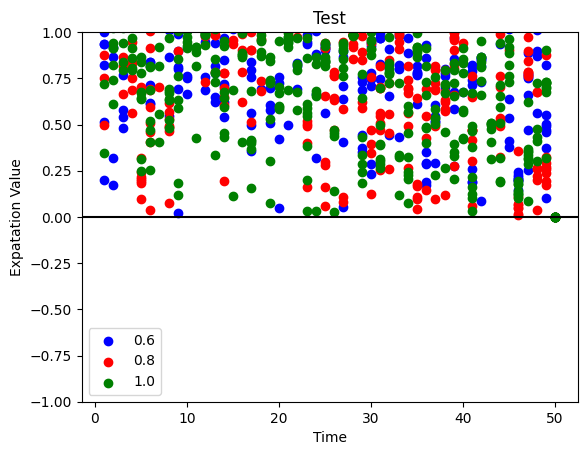

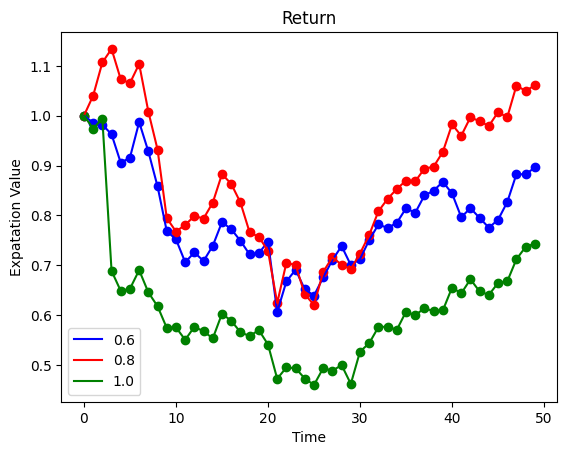

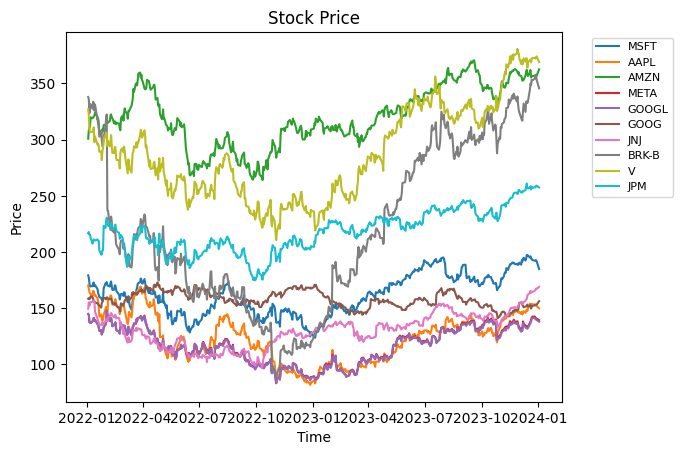

In [ ]:
import yfinance as yf
import pandas as pd
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# def brownian(mean, std_dev, n, size, num_paths = 10000):
#     np.random.seed(42)
#     T = 1.0
#     dt = T / n
#     t = np.linspace(0, T, n)
#     paths = np.zeros((num_paths, n))
#     predict_return = 0
#     for i in range(num_paths):
#         dW = mean * dt + std_dev * np.sqrt(dt) * np.random.randn(n)
#         paths[i, :] = np.cumsum(dW)
#         predict_return += (paths[i,size-1]-paths[i,0])/paths[i,0]
#     predict_return = predict_return/num_paths
#     return predict_return

def brownian(mean, std_dev, n = 250, num_paths = 10000, time = 10):
    # np.random.seed(66)
    T = 1.0
    dt = T / n
    t = np.linspace(0, T, n)
    paths = np.zeros((num_paths, n))
    predict_return = 0
    for i in range(num_paths):
        dW = mean * dt + std_dev * np.sqrt(dt) * np.random.randn(n)
        paths[i, :] = np.cumsum(dW)
        for j in range(time):
            predict_return += (paths[i,j+1]-paths[i,j])/paths[i,j]
    predict_return = predict_return/num_paths
    return predict_return

# 選擇2022年12月S&P500前實權中的股票 資料來源 https://www.mitrade.com/zh/insights/indices/US-index/sp500-index
tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
# FB = META
# BRK.B = BRK-B
start_date = '2022-01-01'
end_date = '2024-01-03'
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
daily_returnss = data.pct_change().fillna(method='ffill')
transposed_returns = daily_returnss.values.T

def function_solve_x(M,group_size):
    #以多少天為一組
    means = []
    variances = []

    for i in range(1, transposed_returns.shape[1], group_size):
        group = transposed_returns[:, i:i+group_size]
        group_mean = np.mean(group, axis=1)
        group_var = np.var(group, axis=1)
        means.append(group_mean)
        variances.append(group_var)

    means = np.array(means)
    variances = np.array(variances)

    predict_return = []
    for j in range(len(means)):
        for i in range(len(tickers)):
            predict_return.append(brownian(means[j][i], variances[j][i], len(data.values), group_size))
    predict_return = np.array(predict_return)
    predict_return = predict_return.reshape(len(means),len(tickers))

    daily_returns = predict_return

    daily_return_value = [0]*len(daily_returns)
    daily_return_result = [0]*len(daily_returns)

    x = cp.Variable(len(tickers))

    for i in range (1,len(daily_returns)):
      constraints = [cp.sum(x) == 1, x >= 0.00000001, x <= M ]
      objective = cp.Minimize( -cp.log( 1 + daily_returns[i] @ x ) )
      prob = cp.Problem(objective, constraints)
      result = prob.solve()
      daily_return_value[i] = x.value
      daily_return_result[i] = result

    return daily_return_value , daily_returns

def function_point(daily_return_value,daily_returns):
    x_data = []
    y_data = []

    for t in range(1, len(daily_returns)):
        for j in range(len(tickers)):
            if j == np.argmax(daily_return_value[t]):
                continue
            x_data.append(t)
            y_value = (daily_returns[t][np.argmax(daily_return_value[t])] - daily_returns[t][j]) / (
                1 + daily_return_value[t] @ daily_returns[t]
            )
            y_data.append(y_value)

    return x_data,y_data

def function_line(daily_return_value,group_size):
    v_0 = 1
    v = [1]
    for i in range(1,len(daily_return_value)-1):
          R_n = [1] * len(tickers)
          for j in range(len(tickers)):
              for k in range((i-1)*group_size+1,i*group_size+1):
                  R_n[j] = (1 + daily_returnss.values[k][j])*R_n[j]
              R_n[j] = R_n[j] - 1
          v_1 = (1 +(np.dot(daily_return_value[i], R_n))) * v_0
          v.append(v_1)
          v_0 = v_1
    return v

daily_return_value1, daily_return_result1 = function_solve_x(0.6,10)
daily_return_value2, daily_return_result2 = function_solve_x(0.8,10)
daily_return_value3, daily_return_result3 = function_solve_x(1.0,10)
x_data1, y_data1 = function_point(daily_return_value1,daily_return_result1)
x_data2, y_data2 = function_point(daily_return_value2,daily_return_result2)
x_data3, y_data3 = function_point(daily_return_value3,daily_return_result3)
v1 = function_line(daily_return_value1,10)
v2 = function_line(daily_return_value2,10)
v3 = function_line(daily_return_value3,10)

plt.scatter(x_data1, y_data1, c='blue', marker='o', label = 0.6)
plt.scatter(x_data2, y_data2, c='red', marker='o', label = 0.8)
plt.scatter(x_data3, y_data3, c='green', marker='o',label = 1.0)
plt.legend()
plt.axhline(y=0, color='black', linestyle='-')
plt.ylim(-1, 1)
plt.title('Test')
plt.xlabel('Time')
plt.ylabel('Expatation Value')
plt.show()


for i in range(len(v1)):
    plt.plot(i,v1[i], 'bo')
    plt.plot(i,v2[i], 'ro')
    plt.plot(i,v3[i], 'go')
plt.plot(range(len(v1)), v1, 'b-', label = 0.6)
plt.plot(range(len(v2)), v2, 'r-', label = 0.8)
plt.plot(range(len(v3)), v3, 'g-', label = 1.0)
plt.legend()
plt.title('Return')
plt.xlabel('Time')
plt.ylabel('Expatation Value')
plt.show()

for i in range(len(tickers)):
    plt.plot(data.index, data.iloc[:, i], label=tickers[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8)
plt.title('Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

# max_index = [0]*len(daily_returns)
# max2_index = [0]*len(daily_returns)
# for i in range (1,len(daily_returns)):
#   max_index[i] = np.argmax(daily_return_value[i])
#   max2_index[i] = np.argsort(daily_return_value[i])[-2]

# daily_return_state = 0
# for t in range(1,len(daily_returns)):
#   for j in range(len(tickers)):
#    if (daily_returns[t][np.argmax(daily_return_value[t])]-daily_returns[t][j])/(1+daily_return_value[t] @ daily_returns[t]) < 0:
#      print(t,j)
#      print(daily_returns[t][np.argmax(daily_return_value[t])],daily_returns[t][j],1+daily_return_value[t] @ daily_returns[t])
#      daily_return_state = 1
#      break
# for t in range(1,len(daily_returns)):
#   for j in range(len(tickers)) :
#     if j == np.argmax(daily_return_value[t]):
#       continue
#     if (daily_returns[t][np.argsort(daily_return_value[t])[-2]]-daily_returns[t][j])/(1+daily_return_value[t] @ daily_returns[t]) < 0:
#       print(t,j)
#       daily_return_state = 1
#       break
# if (daily_return_state == 0):
#   print("finish and correct")

# for t in range(1,len(daily_returns)):
#   if max_index[t] != np.argmax(daily_returns[t]):
#     print(t,max_index[t],np.argmax(daily_returns[t]))
#   if max2_index[t] != np.argsort(daily_returns[t])[-2]:
#     print(t,max2_index[t],np.argsort(daily_return_value[t])[-2])

[*********************100%***********************]  10 of 10 completed
<ipython-input-19-d5b29ac66b6e>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returns = data.pct_change().fillna(method='ffill')
<ipython-input-19-d5b29ac66b6e>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  paths[i, j] = paths[i, j-1] * np.exp((mean_returns[stock_index] - 0.5 * std_returns[stock_index]**2) * dt + std_returns[stock_index] * dW)


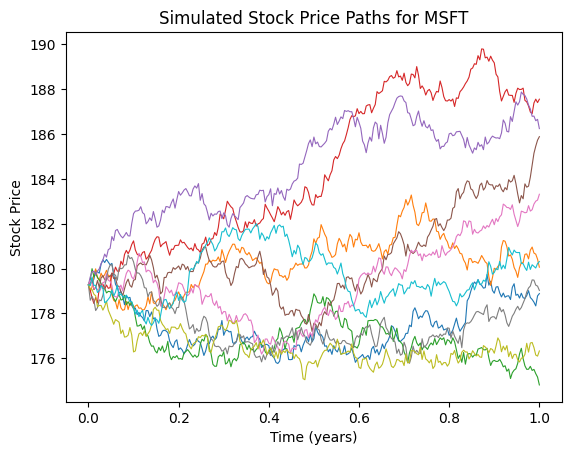

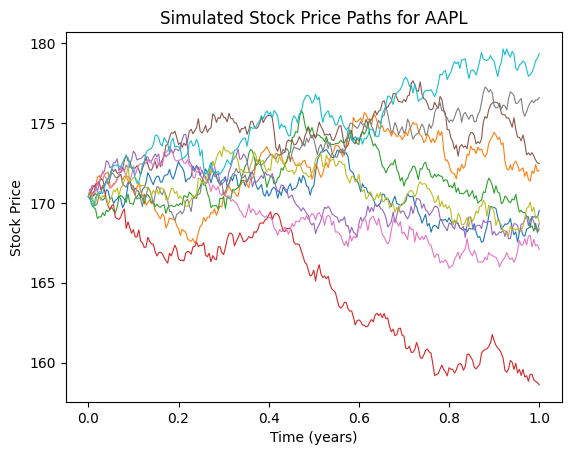

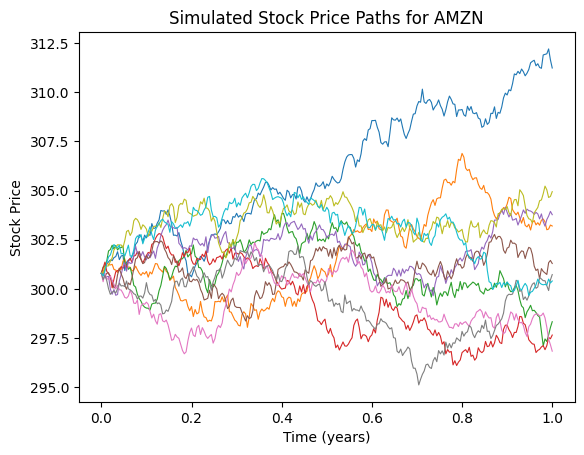

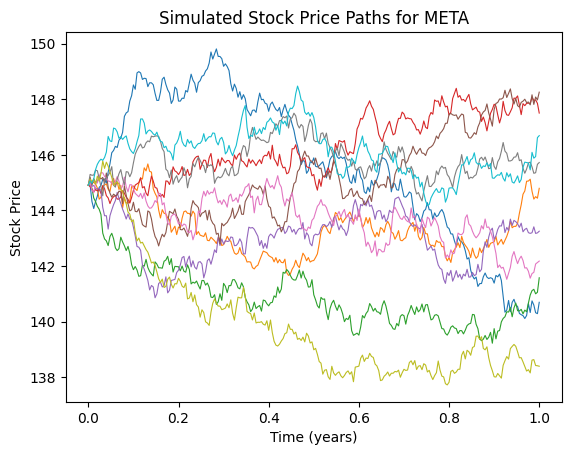

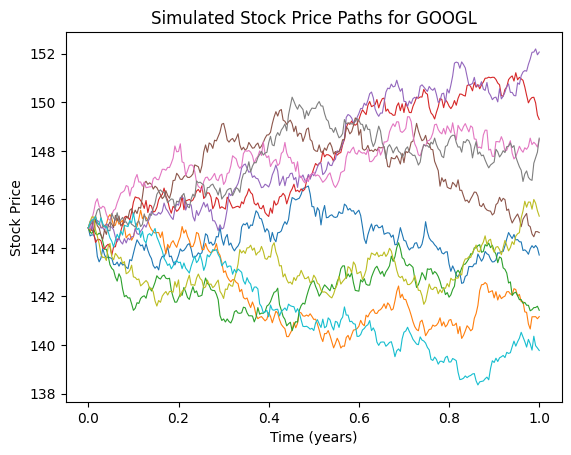

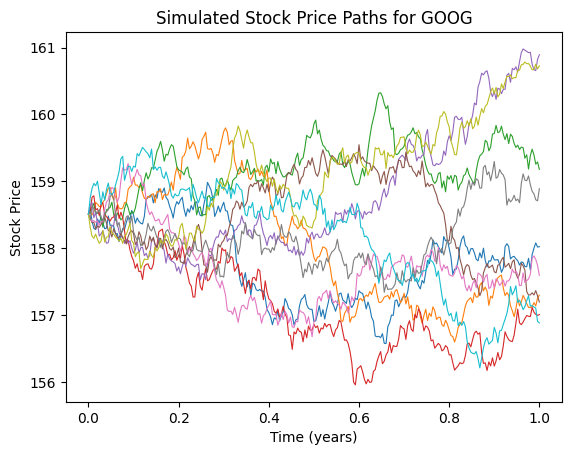

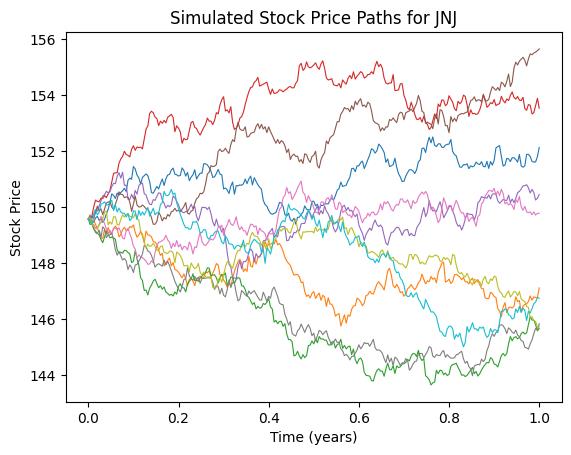

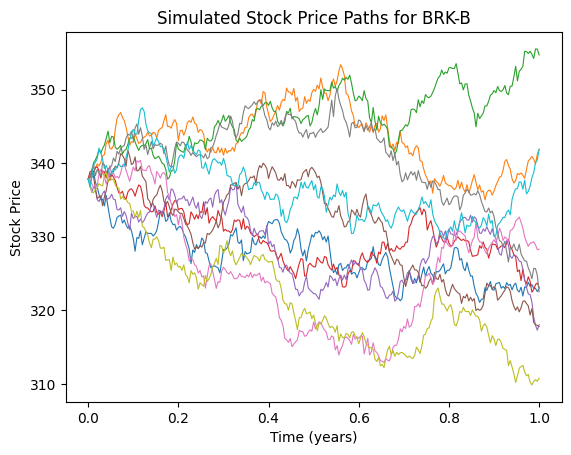

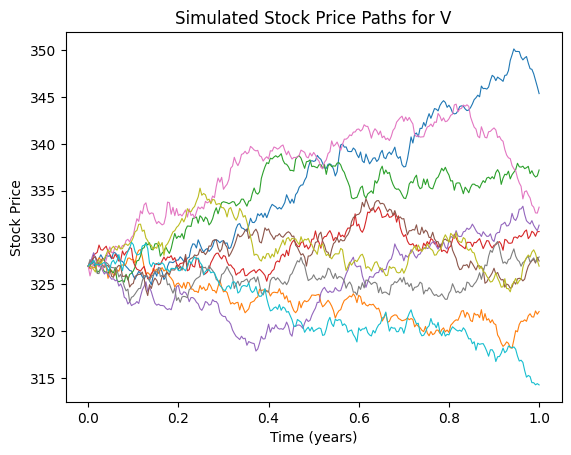

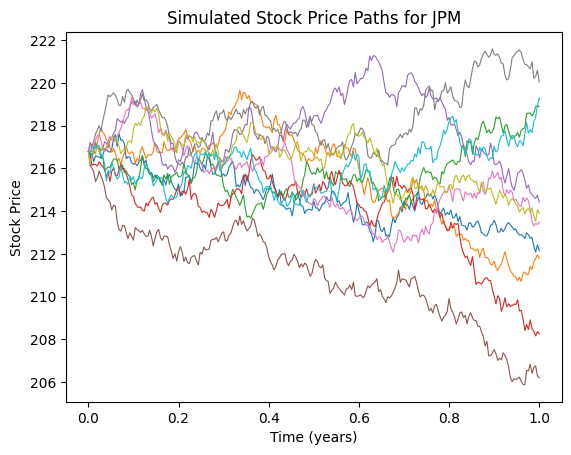

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 選擇2022年12月S&P500前實權中的股票
tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
start_date = '2022-01-01'
end_date = '2023-01-01'
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
daily_returns = data.pct_change().fillna(method='ffill')
mean_returns = daily_returns.mean()
std_returns = daily_returns.std()

np.random.seed(42)
T = 1.0
dt = T / len(data.values)
t = np.linspace(0, T, len(data.values))

num_paths = 10000
paths = np.zeros((num_paths, len(data.values)))

for stock_index in range(len(tickers)):
    paths[:, 0] = data.iloc[0, stock_index]
    for i in range(num_paths):
        for j in range(1, len(data.values)):
            dW = np.random.randn() * np.sqrt(dt)
            paths[i, j] = paths[i, j-1] * np.exp((mean_returns[stock_index] - 0.5 * std_returns[stock_index]**2) * dt + std_returns[stock_index] * dW)

    df_paths = pd.DataFrame(paths, columns=data.index)
    file_name = f"{tickers[stock_index]}_simulated_paths.csv"
    df_paths.to_csv(file_name)

    plt.figure()
    for i in range(10):
        plt.plot(t, paths[i], lw=0.8)
    plt.title(f'Simulated Stock Price Paths for {tickers[stock_index]}')
    plt.xlabel('Time (years)')
    plt.ylabel('Stock Price')
    plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

x = cp.Variable(3)

daily_returns = [[200,3,1],[4,5,6],[1,2,3]]
daily_return_value = [0]
daily_return_result = [0]

constraints = [cp.sum(x) == 1, x >= 0.00000001, x <= 1 ]
y = 0
for i in range (len(daily_returns)):
    y += ( -(cp.log( 1 + daily_returns[i] @ x ) ))
objective = cp.Minimize(y)
prob = cp.Problem(objective, constraints)
result = prob.solve()
daily_return_value = x.value
daily_return_result = result

print(daily_return_value)
print(daily_return_result)


[8.13107989e-01 4.79099618e-08 1.86891961e-01]
-7.644715602023879


In [ ]:
import cvxpy as cp
import numpy as np

x = cp.Variable(4)

daily_returns = [[[200, 3, 7, 6], [4, 5, 6, 7]], [[1, 2, 3, 4],[2,5,2,4]]]
print(len(daily_returns))
constraints = [cp.sum(x) == 1, x >= 0.00000001, x <= 1]

y = 0
for i in range(len(daily_returns)):
    y += -((daily_returns[i][1] @ x))

objective = cp.Minimize(1/3 * y)

prob = cp.Problem(objective, constraints)
result = prob.solve()

daily_return_value = x.value
daily_return_result = result

print("Optimal weights:", daily_return_value)
print("Optimal objective value:", daily_return_result)


2
Optimal weights: [8.64410396e-09 9.79400600e-09 1.22324619e-08 9.99999969e-01]
Optimal objective value: -3.6666666367629155


[*********************100%***********************]  10 of 10 completed
<ipython-input-11-7221a6e996c0>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returns_first_year = data_first_year.pct_change().fillna(method='ffill')
[*********************100%***********************]  10 of 10 completed
<ipython-input-11-7221a6e996c0>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returns_second_year = data_second_year.pct_change().fillna(method='ffill')
[*********************100%***********************]  10 of 10 completed
<ipython-input-11-7221a6e996c0>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  paths[sto

Check First year M = 0.8 weight
All correct
Check First year M = 0.6 weight
All correct
Check Second year M = 0.8 weight
All correct
Check Second year M = 0.6 weight
All correct


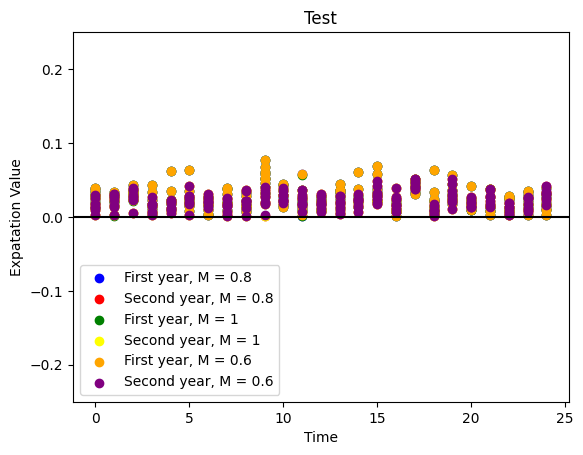

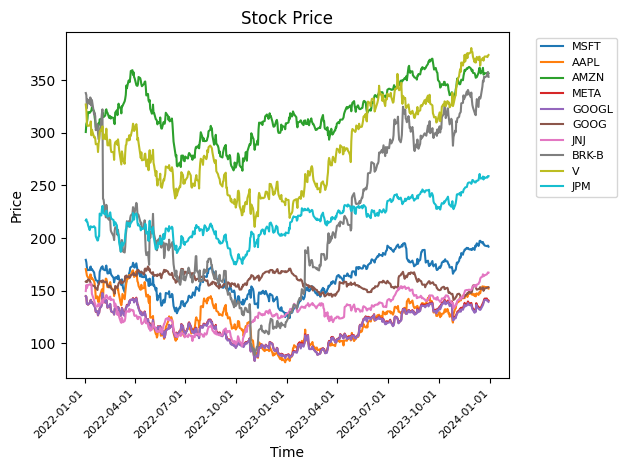

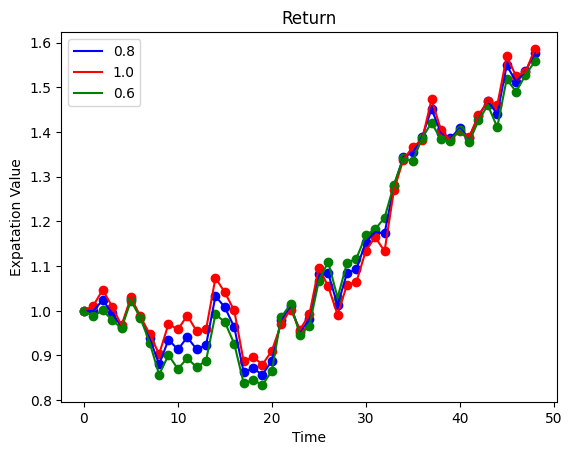

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import matplotlib.dates as mdates

# 選擇2022年12月S&P500前十權重的股票
tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
start_date = '2022-01-01'
end_date = '2023-01-01'
data_first_year = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
daily_returns_first_year = data_first_year.pct_change().fillna(method='ffill')
mean_returns_first_year = daily_returns_first_year.mean()
std_returns_first_year = daily_returns_first_year.std()

tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
start_date = '2023-01-01'
end_date = '2024-01-03'
data_second_year = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
daily_returns_second_year = data_second_year.pct_change().fillna(method='ffill')
mean_returns_second_year = daily_returns_second_year.mean()
std_returns_second_year = daily_returns_second_year.std()

tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
start_date = '2022-01-01'
end_date = '2024-01-01'
data_All = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']

def brownian(mean, std_dev, data, group_size, M = 0.8, num_paths = 1000):
    np.random.seed(53)
    T = 1.0
    dt = T / len(data.values)
    t = np.linspace(0, T, len(data.values))
    paths = np.zeros((len(tickers),num_paths, len(data.values)))
    predict_return = np.zeros([num_paths, (len(data.values)//group_size), len(tickers)])

    for stock_index in range(len(tickers)):
        paths[stock_index, : , 0] = data.iloc[0, stock_index]
        for i in range(num_paths):
            for j in range(1, len(data.values)):
                dW = np.random.randn() * np.sqrt(dt)
                paths[stock_index,i, j] = paths[stock_index,i, j-1] * np.exp((mean[stock_index] - 0.5 * std_dev[stock_index]**2) * dt + std_dev[stock_index] * dW)
            for k in range(0, len(data.values) - group_size , group_size):
                returns_sum = 0
                for m in range(group_size):
                    returns_sum += (paths[stock_index, i, k + m + 1] - paths[stock_index, i, k + m]) / paths[stock_index, i, k + m]

                predict_return[i, k//group_size, stock_index] = returns_sum / group_size

    x = cp.Variable(len(tickers))
    daily_return_value = [0]*(len(data.values)//group_size)
    daily_return_result = [0]*(len(data.values)//group_size)
    for i in range (len(data.values)//(group_size)):
        constraints = [cp.sum(x) == 1, x >= 0.00000001, x <= M ]
        y = 0
        for j in range(num_paths):
            y += cp.log(1 + (predict_return[j, i, :] @ x))
        objective = cp.Minimize(-1/num_paths * y)
        prob = cp.Problem(objective, constraints)
        result = prob.solve()
        daily_return_value[i] = x.value
        daily_return_result[i] = result

    return daily_return_value, predict_return, paths

def function_point(daily_return_value,predict_return):
    x_data = []
    y_data = []

    for t in range(len(daily_return_value)):
        for j in range(len(tickers)):
            if j == np.argmax(daily_return_value[t]):
                continue
            x_data.append(t)
            y_value = 0
            for k in range(len(predict_return)):
                y_value += (predict_return[k][t][np.argmax(daily_return_value[t])] - predict_return[k][t][j]) / (
                          1 + daily_return_value[t] @ predict_return[k][t])
                # y_value = y_value/len(predict_return)
            y_data.append(y_value)

    return x_data,y_data

def function_line(daily_return_value, group_size, daily_returns, value):
    v = value.copy()
    for i in range(1,len(daily_return_value)):
          R_n = [1] * len(tickers)
          for j in range(len(tickers)):
              for k in range(i*group_size+1,(i+1)*group_size+1):
                  R_n[j] = (1 + daily_returns.values[k][j])*R_n[j]
              R_n[j] = R_n[j] - 1
          v_1 = (1 +(np.dot(daily_return_value[i], R_n))) * v[-1]
          v.append(v_1)
    return v

def check_function(daily_return_value1, daily_return_value2):
    a = 1
    for t in range(len(daily_return_value1)):
        if np.argmax(daily_return_value1[t]) != np.argmax(daily_return_value2[t]):
            print("time:",t)
            print("daily_return_value1",np.argmax(daily_return_value1[t]))
            print("daily_return_value2",np.argmax(daily_return_value2[t]))
            a = 0
    if a == 1:
        print("All correct")

group_size = 10

daily_return_value_first_year, predict_return_first_year, path_first_year = brownian(mean_returns_first_year, std_returns_first_year, data_first_year, group_size)
daily_return_value_second_year, predict_return_second_year, path_second_year = brownian(mean_returns_second_year, std_returns_second_year, data_second_year, group_size)
daily_return_value_first_year_M1, predict_return_first_year_M1, path_first_year_M1 = brownian(mean_returns_first_year, std_returns_first_year, data_first_year, group_size, M = 1)
daily_return_value_second_year_M1, predict_return_second_year_M1, path_second_year_M1 = brownian(mean_returns_second_year, std_returns_second_year, data_second_year, group_size, M = 1)
daily_return_value_first_year_M06, predict_return_first_year_M06, path_first_year_M06 = brownian(mean_returns_first_year, std_returns_first_year, data_first_year, group_size, M = 0.6)
daily_return_value_second_year_M06, predict_return_second_year_M06, path_second_year_M06 = brownian(mean_returns_second_year, std_returns_second_year, data_second_year, group_size, M = 0.6)

print("Check First year M = 0.8 weight")
check_function(daily_return_value_first_year, daily_return_value_first_year_M1)
print("Check First year M = 0.6 weight")
check_function(daily_return_value_first_year_M06, daily_return_value_first_year_M1)
print("Check Second year M = 0.8 weight")
check_function(daily_return_value_second_year, daily_return_value_second_year_M1)
print("Check Second year M = 0.6 weight")
check_function(daily_return_value_second_year_M06, daily_return_value_second_year_M1)
# print("daily_return_value_first_year",daily_return_value_first_year)
# print("daily_return_value_first_year_M1",daily_return_value_first_year_M1)
# print("daily_return_value_second_year",daily_return_value_second_year)
# print("daily_return_value_second_year_M1",daily_return_value_second_year_M1)

x_data_first_year, y_data_first_year = function_point(daily_return_value_first_year,predict_return_first_year)
x_data_second_year, y_data_second_year = function_point(daily_return_value_second_year,predict_return_second_year)
x_data_first_year_M1, y_data_first_year_M1 = function_point(daily_return_value_first_year_M1,predict_return_first_year_M1)
x_data_second_year_M1, y_data_second_year_M1 = function_point(daily_return_value_second_year_M1,predict_return_second_year_M1)
x_data_first_year_M06, y_data_first_year_M06 = function_point(daily_return_value_first_year_M06,predict_return_first_year_M06)
x_data_second_year_M06, y_data_second_year_M06 = function_point(daily_return_value_second_year_M06,predict_return_second_year_M06)

value_first_year = function_line(daily_return_value_first_year, group_size, daily_returns_first_year, [1])
value_second_year = function_line(daily_return_value_second_year, group_size, daily_returns_second_year, value_first_year)
value_first_year_M1 = function_line(daily_return_value_first_year_M1, group_size, daily_returns_first_year, [1])
value_second_year_M1 = function_line(daily_return_value_second_year_M1, group_size, daily_returns_second_year, value_first_year_M1)
value_first_year_M06 = function_line(daily_return_value_first_year_M06, group_size, daily_returns_first_year, [1])
value_second_year_M06 = function_line(daily_return_value_second_year_M06, group_size, daily_returns_second_year, value_first_year_M06)

plt.scatter(x_data_first_year, y_data_first_year, c='blue', marker='o', label = "First year, M = 0.8")
plt.scatter(x_data_second_year, y_data_second_year, c='red', marker='o', label = "Second year, M = 0.8")
plt.scatter(x_data_first_year_M1, y_data_first_year_M1, c='green', marker='o', label = "First year, M = 1")
plt.scatter(x_data_second_year_M1, y_data_second_year_M1, c='yellow', marker='o', label = "Second year, M = 1")
plt.scatter(x_data_first_year_M06, y_data_first_year_M06, c='orange', marker='o', label = "First year, M = 0.6")
plt.scatter(x_data_second_year_M06, y_data_second_year_M06, c='purple', marker='o', label = "Second year, M = 0.6")
plt.legend()
plt.axhline(y=0, color='black', linestyle='-')
plt.ylim(-0.25, 0.25)
plt.title('Test')
plt.xlabel('Time')
plt.ylabel('Expatation Value')
plt.show()

for i in range(len(tickers)):
    plt.plot(data_All.index, data_All.iloc[:, i], label=tickers[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8)
plt.title('Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right', fontsize=8, fontstyle='normal')
plt.tight_layout()
plt.show()

for i in range(len(value_second_year)):
    plt.plot(i,value_second_year[i], 'bo')
    plt.plot(i,value_second_year_M1[i], 'ro')
    plt.plot(i,value_second_year_M06[i], 'go')
plt.plot(range(len(value_second_year)), value_second_year, 'b-', label = 0.8)
plt.plot(range(len(value_second_year_M1)), value_second_year_M1, 'r-', label = 1.0)
plt.plot(range(len(value_second_year_M06)), value_second_year_M06, 'g-', label = 0.6)
plt.legend()
plt.title('Return')
plt.xlabel('Time')
plt.ylabel('Expatation Value')
plt.show()

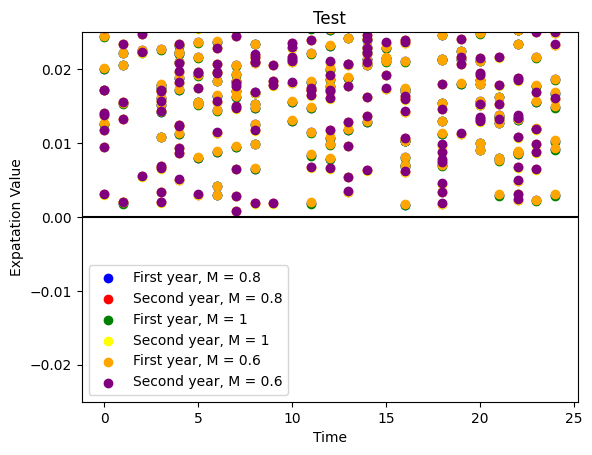

In [ ]:
plt.scatter(x_data_first_year, y_data_first_year, c='blue', marker='o', label = "First year, M = 0.8")
plt.scatter(x_data_second_year, y_data_second_year, c='red', marker='o', label = "Second year, M = 0.8")
plt.scatter(x_data_first_year_M1, y_data_first_year_M1, c='green', marker='o', label = "First year, M = 1")
plt.scatter(x_data_second_year_M1, y_data_second_year_M1, c='yellow', marker='o', label = "Second year, M = 1")
plt.scatter(x_data_first_year_M06, y_data_first_year_M06, c='orange', marker='o', label = "First year, M = 0.6")
plt.scatter(x_data_second_year_M06, y_data_second_year_M06, c='purple', marker='o', label = "Second year, M = 0.6")
plt.legend()
plt.axhline(y=0, color='black', linestyle='-')
plt.ylim(-0.025, 0.025)
plt.title('Test')
plt.xlabel('Time')
plt.ylabel('Expatation Value')
plt.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24]
[0.3794141358232799, 0.11173570412767353, 0.2517186596803683, 0.27857346156995616, 0.2755083573428748, 0.2298260218282718, 0.3197222466005269, 0.18579365251251873, 0.3562545549189621, 0.262

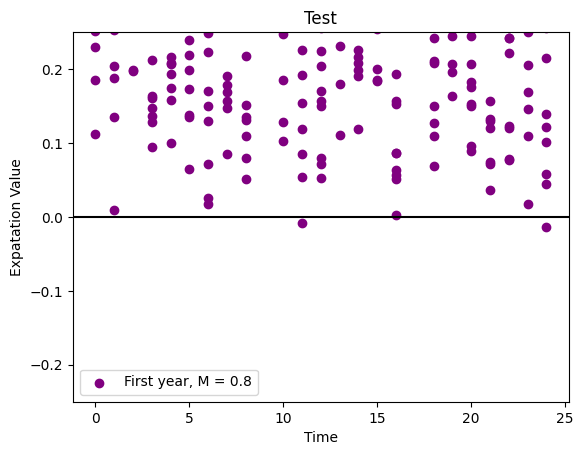

In [ ]:
def function_point(daily_return_value, paths, group_size, num_paths = 1000):
    x_data = []
    y_data = []

    daily_return =  np.zeros([num_paths, len(paths[0][0]) - 1, len(tickers)])
    for stock_index in range(len(tickers)):
        for i in range(num_paths):
            for k in range(len(paths[0][0])-1):
                daily_return[i][k][stock_index] = (paths[stock_index, i, k + 1] - paths[stock_index, i, k ]) / paths[stock_index, i, k ]

    R_n = np.ones([num_paths,(len(daily_return[0])//group_size),len(tickers)])
    for i in range(num_paths):
        for j in range(len(tickers)):
            for group in range(len(daily_return[0]) // group_size):
                compound_return = 1
                for k in range(group * group_size, (group + 1) * group_size):
                    compound_return *= (1 + daily_return[i][k][j])

                R_n[i][group][j] = compound_return - 1

    for t in range(len(daily_return_value)):
        for j in range(len(tickers)):
            if j == np.argmax(daily_return_value[t]):
                continue
            x_data.append(t)
            y_value = 0
            for i in range(num_paths):
                y_value += (R_n[i][t][np.argmax(daily_return_value[t])] - R_n[i][t][j]) / (
                          1 + daily_return_value[t] @ R_n[i][t])
                # y_value = y_value/len(predict_return)
            y_data.append(y_value)

    return x_data,y_data

x_data, y_data = function_point(daily_return_value_first_year, path_first_year, group_size)
print(x_data)
print(y_data)

plt.scatter(x_data, y_data, c='purple', marker='o', label = "First year, M = 0.8")
plt.legend()
plt.axhline(y=0, color='black', linestyle='-')
plt.ylim(-0.25, 0.25)
plt.title('Test')
plt.xlabel('Time')
plt.ylabel('Expatation Value')
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import matplotlib.dates as mdates

def Cumulative_rate_of_return(y_data):
    Cumulative_rate_of_return = (y_data[-1] - y_data[0])/y_data[0]
    return Cumulative_rate_of_return

def variances(y_data):
    variances = np.var(y_data)
    return variances

def log_return(y_data):
    log_return = np.log(y_data[-1]/y_data[0])
    return log_return

def sharpe_ratio(y_data, risk_free_rate=0):
    daily_returns = [0]*(len(y_data)-1)
    for i in range(len(y_data)-1):
        daily_returns[i] = (y_data[i+1] - y_data[i])/y_data[i]
        (daily_returns[i] - risk_free_rate) / len(y_data)
    excess_returns = np.array(daily_returns)
    mean_excess_return = excess_returns.mean() * len(y_data)
    annual_std = excess_returns.std() * np.sqrt(len(y_data))
    sharpe_ratio = mean_excess_return / annual_std
    return sharpe_ratio

def max_drawdown(y_data):
    y_data = pd.Series(y_data)
    cumulative_max = y_data.cummax()
    drawdown = (y_data - cumulative_max) / cumulative_max
    max_drawdown = drawdown.min()

    return max_drawdown

print(len(value_first_year))
print(len(value_second_year))
print((value_first_year_M1))
print((value_second_year_M1))
print((value_first_year_M06))
print((value_second_year_M06))
print("x_data_first_year",x_data_first_year,"y_data_first_year",y_data_first_year)
print("y_data_second_year",y_data_second_year)

results = {
    'Max Drawdown': [
        max_drawdown(value_first_year),
        max_drawdown(value_second_year),
        max_drawdown(value_first_year_M1),
        max_drawdown(value_second_year_M1),
        max_drawdown(value_first_year_M06),
        max_drawdown(value_second_year_M06)
    ],
    'Log Return': [
        log_return(value_first_year),
        log_return(value_second_year),
        log_return(value_first_year_M1),
        log_return(value_second_year_M1),
        log_return(value_first_year_M06),
        log_return(value_second_year_M06)
    ],
    'Variances': [
        variances(value_first_year),
        variances(value_second_year),
        variances(value_first_year_M1),
        variances(value_second_year_M1),
        variances(value_first_year_M06),
        variances(value_second_year_M06)
    ],
    'Sharpe Ratio': [
        sharpe_ratio(value_first_year),
        sharpe_ratio(value_second_year),
        sharpe_ratio(value_first_year_M1),
        sharpe_ratio(value_second_year_M1),
        sharpe_ratio(value_first_year_M06),
        sharpe_ratio(value_second_year_M06)
    ],
    'Cumulative Rate of Return (%)': [
        Cumulative_rate_of_return(value_first_year) * 100,
        Cumulative_rate_of_return(value_second_year) * 100,
        Cumulative_rate_of_return(value_first_year_M1) * 100,
        Cumulative_rate_of_return(value_second_year_M1) * 100,
        Cumulative_rate_of_return(value_first_year_M06) * 100,
        Cumulative_rate_of_return(value_second_year_M06) * 100
    ]
}
df_results = pd.DataFrame(results, index=['First Year','Second Year','First Year M1','Second Year M1','First Year M06','Second Year M06'])
print(df_results)

25
49
[1, 1.0116514665456937, 1.0472280443080784, 1.0094700209268617, 0.9672269605936589, 1.0300587229869829, 0.9873542511104343, 0.9481845465336278, 0.9027562301354293, 0.9706130593225748, 0.9581393466497148, 0.9893345254392548, 0.9543819186633399, 0.9581834889641246, 1.0738196059679364, 1.0410198895631386, 1.0006992429330959, 0.8867098078942424, 0.8966478496992427, 0.8797183335434055, 0.9103791911695579, 0.9710798972585133, 1.0027805507418979, 0.9575876279596565, 0.9921315827326425]
[1, 1.0116514665456937, 1.0472280443080784, 1.0094700209268617, 0.9672269605936589, 1.0300587229869829, 0.9873542511104343, 0.9481845465336278, 0.9027562301354293, 0.9706130593225748, 0.9581393466497148, 0.9893345254392548, 0.9543819186633399, 0.9581834889641246, 1.0738196059679364, 1.0410198895631386, 1.0006992429330959, 0.8867098078942424, 0.8966478496992427, 0.8797183335434055, 0.9103791911695579, 0.9710798972585133, 1.0027805507418979, 0.9575876279596565, 0.9921315827326425, 1.096447069891432, 1.05484

In [ ]:
t = 0
k = 0
print(daily_return_value_first_year[t] @ predict_return_first_year[k][t])
print(daily_return_value_first_year[t])
print(predict_return_first_year[k][t])

-4.6773084632529074e-05
[7.99999881e-01 6.56510839e-08 1.99999237e-01 1.17542872e-07
 9.88314826e-08 1.00828748e-07 1.36269568e-07 8.23340839e-08
 2.09799593e-07 7.09048141e-08]
[[[-2.97197063e-05  5.98457290e-04 -1.14987475e-04 ...  2.52375365e-04
    1.88678693e-04 -1.65735225e-04]
  [ 2.10166916e-04 -1.13580587e-03  1.38932115e-04 ... -1.66804597e-04
   -4.73152072e-04 -6.98327211e-04]
  [-1.33839145e-04  6.83211629e-04  1.50490671e-04 ...  9.87172392e-04
   -3.00378527e-04  4.11924845e-04]
  ...
  [-3.65516251e-04 -2.50792416e-05  3.38546285e-04 ...  8.21532287e-05
   -6.75455945e-04  4.63830022e-04]
  [-1.00512817e-03  2.88338705e-04  3.07170568e-04 ...  1.33449692e-03
    7.30748501e-04  4.52677267e-04]
  [ 2.53939613e-04  5.59670566e-04 -2.58730478e-04 ... -5.80803113e-04
   -4.57295667e-04 -5.32411073e-05]]

 [[-6.58571711e-04 -2.82603832e-05 -3.46627296e-05 ... -3.63036212e-04
   -4.11244448e-04 -3.11719034e-04]
  [-4.41531408e-04 -1.49188366e-04 -3.52165333e-04 ...  3.0168336

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import matplotlib.dates as mdates
# 選擇2022年12月S&P500前十權重的股票
tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
start_date = '2022-01-01'
end_date = '2023-01-01'
data_first_year = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
daily_returns_first_year = data_first_year.pct_change().fillna(method='ffill')
mean_returns_first_year = daily_returns_first_year.mean()
std_returns_first_year = daily_returns_first_year.std()

print(daily_returns_first_year)
print(mean_returns_first_year)
print(std_returns_first_year)

def brownian(mean, std_dev, data, M = 0.8, num_paths = 1000, group_size = 10):
    np.random.seed(53)
    T = 1.0
    dt = T / len(data.values)
    t = np.linspace(0, T, len(data.values))
    paths = np.zeros((len(tickers),num_paths, len(data.values)))
    predict_return = np.zeros([num_paths, (len(data.values)//group_size), len(tickers)])

    for stock_index in range(len(tickers)):
        paths[stock_index, : , 0] = data.iloc[0, stock_index]
        for i in range(num_paths):
            for j in range(1, len(data.values)):
                dW = np.random.randn() * np.sqrt(dt)
                paths[stock_index,i, j] = paths[stock_index,i, j-1] * np.exp((mean[stock_index] - 0.5 * std_dev[stock_index]**2) * dt + std_dev[stock_index] * dW)
            for k in range(0, len(data.values) - group_size , group_size):
                returns_sum = 0
                for m in range(group_size):
                    returns_sum += (paths[stock_index, i, k + m + 1] - paths[stock_index, i, k + m]) / paths[stock_index, i, k + m]

                predict_return[i, k//group_size, stock_index] = returns_sum / group_size

    return paths, predict_return

daily_return_value_first_year, predict_return_first_year = brownian(mean_returns_first_year, std_returns_first_year, data_first_year, group_size = 10)
print("paths",daily_return_value_first_year)
print("return",predict_return_first_year)

[*********************100%***********************]  10 of 10 completed
<ipython-input-6-c52d6882b163>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returns_first_year = data_first_year.pct_change().fillna(method='ffill')
<ipython-input-6-c52d6882b163>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  paths[stock_index,i, j] = paths[stock_index,i, j-1] * np.exp((mean[stock_index] - 0.5 * std_dev[stock_index]**2) * dt + std_dev[stock_index] * dW)


Ticker                         AAPL      AMZN     BRK-B      GOOG     GOOGL  \
Date                                                                          
2022-01-03 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2022-01-04 00:00:00+00:00 -0.012692 -0.016916  0.025732 -0.004536 -0.004083   
2022-01-05 00:00:00+00:00 -0.026600 -0.018893  0.004505 -0.046830 -0.045876   
2022-01-06 00:00:00+00:00 -0.016693 -0.006711  0.010648 -0.000745 -0.000200   
2022-01-07 00:00:00+00:00  0.000988 -0.004288  0.020944 -0.003973 -0.005303   
...                             ...       ...       ...       ...       ...   
2022-12-23 00:00:00+00:00 -0.002798  0.017425  0.012554  0.017562  0.016750   
2022-12-27 00:00:00+00:00 -0.013878 -0.025924 -0.003067 -0.020933 -0.020621   
2022-12-28 00:00:00+00:00 -0.030685 -0.014692 -0.006938 -0.016718 -0.015677   
2022-12-29 00:00:00+00:00  0.028324  0.028844  0.018555  0.028799  0.028249   
2022-12-30 00:00:00+00:00  0.002469 -0.002138 -0.000

In [ ]:
print(len(daily_return_value_first_year[0][0]))
print(len(daily_return_value_first_year[0]))
print(len(daily_return_value_first_year))
# print((predict_return_first_year[0][-1]))
print(predict_return_first_year[0][0])
group_size = 10
stock_index = 0
i = 0
l = 0
paths = daily_return_value_first_year
# for k in range(0, 2 , group_size):
returns_sum = 0
for m in range(group_size):
    returns_sum += (paths[stock_index, i, l + m + 1] - paths[stock_index, i, l + m]) / paths[stock_index, i, l + m]
returns_sum = returns_sum / group_size

for k in range(0, 251 - group_size , group_size):
    returns_sum2 = 0
    for m in range(group_size):
          returns_sum2 += (paths[stock_index, i, k + m + 1] - paths[stock_index, i, k + m]) / paths[stock_index, i, k + m]
    returns_sum2 = returns_sum2 / group_size
    # print(returns_sum2)
    # print(predict_return_first_year[i][k//group_size][stock_index])
print(returns_sum)
print((predict_return_first_year[i, l//group_size, stock_index]))
print(returns_sum2)
print(predict_return_first_year[0][-1][0])

251
1000
10
[-2.97197090e-05  5.98457290e-04 -1.14987475e-04 -1.99170144e-04
 -3.97815542e-04  1.35975919e-04  3.31031717e-04  2.52375365e-04
  1.88678673e-04 -1.65735265e-04]
-2.9719709010159395e-05
-2.9719709010159395e-05
0.0002539396035221162
0.0002539396035221162


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import matplotlib.dates as mdatesprint
 (251//10)

25


In [ ]:
import numpy as np
y = np.zeros((3, 4, 5))
print(y[0][1])

[0. 0. 0. 0. 0.]


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
predict_return = np.zeros((10,10000, (251 // 10)+1))
print(predict_return)
print(predict_return.shape)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
(10, 10000

[*********************100%***********************]  10 of 10 completed
<ipython-input-16-1e80fa20c022>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returns_first_year = data_first_year.pct_change().fillna(method='ffill')
[*********************100%***********************]  10 of 10 completed
<ipython-input-16-1e80fa20c022>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returns_second_year = data_second_year.pct_change().fillna(method='ffill')
[*********************100%***********************]  10 of 10 completed


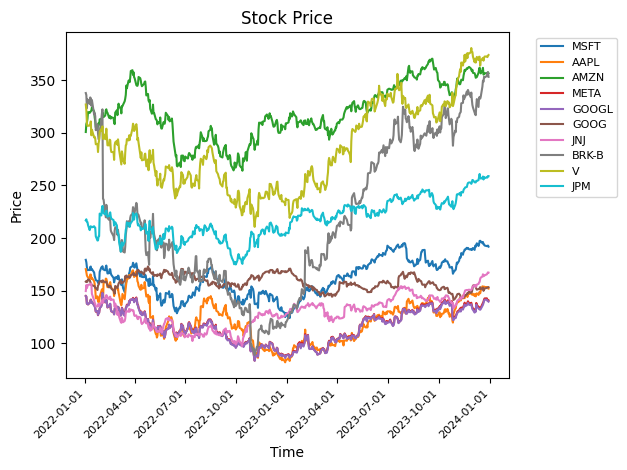

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import matplotlib.dates as mdates

# 選擇2022年12月S&P500前實權中的股票
tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
start_date = '2022-01-01'
end_date = '2023-01-01'
data_first_year = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
daily_returns_first_year = data_first_year.pct_change().fillna(method='ffill')
mean_returns_first_year = daily_returns_first_year.mean()
std_returns_first_year = daily_returns_first_year.std()

tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
start_date = '2023-01-01'
end_date = '2024-01-01'
data_second_year = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
daily_returns_second_year = data_second_year.pct_change().fillna(method='ffill')
mean_returns_second_year = daily_returns_second_year.mean()
std_returns_second_year = daily_returns_second_year.std()

tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
start_date = '2022-01-01'
end_date = '2024-01-01'
data_All = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

for i in range(len(tickers)):
    plt.plot(data_All.index, data_All.iloc[:, i], label=tickers[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8)
plt.title('Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right', fontsize=8, fontstyle='normal')
plt.tight_layout()
plt.show()

[*********************100%***********************]  10 of 10 completed
<ipython-input-2-314e2ab2eff7>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returns_first_year = data_first_year.pct_change().fillna(method='ffill')
[*********************100%***********************]  10 of 10 completed
<ipython-input-2-314e2ab2eff7>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returns_second_year = data_second_year.pct_change().fillna(method='ffill')
[*********************100%***********************]  10 of 10 completed
<ipython-input-2-314e2ab2eff7>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  paths[stock_

Check First year M = 0.8 weight
All correct
Check First year M = 0.6 weight
All correct
Check Second year M = 0.8 weight
All correct
Check Second year M = 0.6 weight
All correct


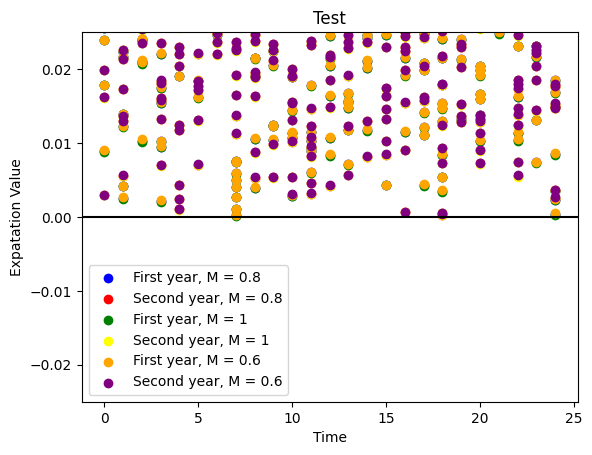

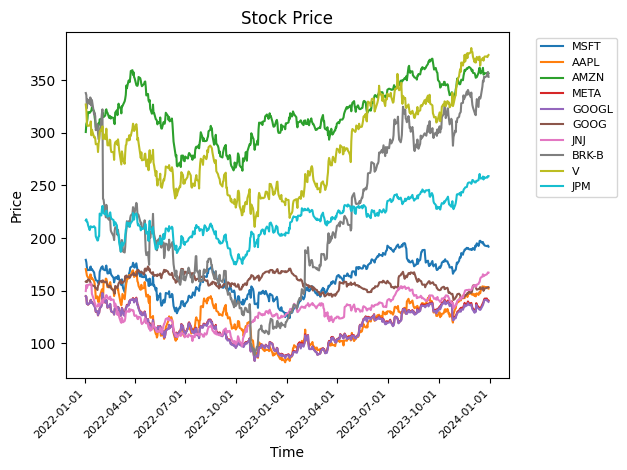

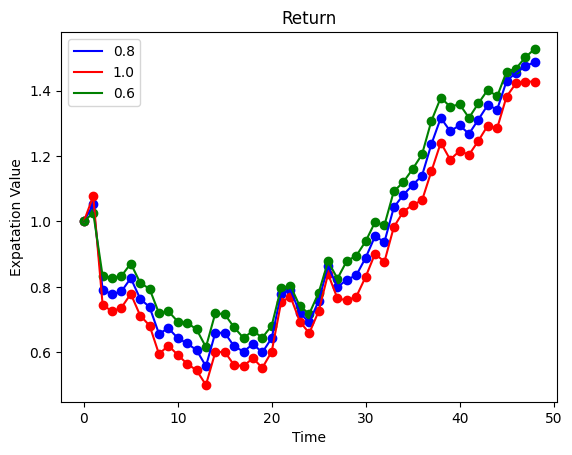

                 Max Drawdown  Log Return  Variances  Sharpe Ratio  \
First Year          -0.469868   -0.368745   0.013760     -0.616359   
Second Year         -0.469868    0.396805   0.079892      1.038565   
First Year M1       -0.535267   -0.417151   0.017936     -0.529036   
Second Year M1      -0.535267    0.355843   0.077964      0.911215   
First Year M06      -0.399937   -0.331183   0.010342     -0.732287   
Second Year M06     -0.399937    0.423548   0.079328      1.186282   

                 Cumulative Rate of Return (%)  
First Year                          -30.839855  
Second Year                          48.706627  
First Year M1                       -34.107870  
Second Year M1                       42.738300  
First Year M06                      -28.192654  
Second Year M06                      52.737168  


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import matplotlib.dates as mdates

# 選擇2022年12月S&P500前十權重的股票
tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
start_date = '2022-01-01'
end_date = '2023-01-01'
data_first_year = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
daily_returns_first_year = data_first_year.pct_change().fillna(method='ffill')
mean_returns_first_year = daily_returns_first_year.mean()
std_returns_first_year = daily_returns_first_year.std()

tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
start_date = '2023-01-01'
end_date = '2024-01-03'
data_second_year = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
daily_returns_second_year = data_second_year.pct_change().fillna(method='ffill')
mean_returns_second_year = daily_returns_second_year.mean()
std_returns_second_year = daily_returns_second_year.std()

tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
start_date = '2022-01-01'
end_date = '2024-01-01'
data_All = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

def brownian(mean, std_dev, data, group_size, M = 0.8, num_paths = 1000):
    np.random.seed(47)
    T = 1.0
    dt = T / len(data.values)
    t = np.linspace(0, T, len(data.values))
    paths = np.zeros((len(tickers),num_paths, len(data.values)))
    predict_return = np.zeros([num_paths, (len(data.values)//group_size), len(tickers)])

    for stock_index in range(len(tickers)):
        paths[stock_index, : , 0] = data.iloc[0, stock_index]
        for i in range(num_paths):
            for j in range(1, len(data.values)):
                dW = np.random.randn() * np.sqrt(dt)
                paths[stock_index,i, j] = paths[stock_index,i, j-1] * np.exp((mean[stock_index] - 0.5 * std_dev[stock_index]**2) * dt + std_dev[stock_index] * dW)
            for k in range(0, len(data.values) - group_size , group_size):
                returns_sum = 0
                for m in range(group_size):
                    returns_sum += (paths[stock_index, i, k + m + 1] - paths[stock_index, i, k + m]) / paths[stock_index, i, k + m]

                predict_return[i, k//group_size, stock_index] = returns_sum / group_size

    x = cp.Variable(len(tickers))
    daily_return_value = [0]*(len(data.values)//group_size)
    daily_return_result = [0]*(len(data.values)//group_size)
    for i in range (len(data.values)//(group_size)):
        constraints = [cp.sum(x) == 1, x >= 0.00000001, x <= M ]
        y = 0
        for j in range(num_paths):
            y += cp.log(1 + (predict_return[j, i, :] @ x))
        objective = cp.Minimize(-1/num_paths * y)
        prob = cp.Problem(objective, constraints)
        result = prob.solve()
        daily_return_value[i] = x.value
        daily_return_result[i] = result

    return daily_return_value, predict_return, paths

def function_point(daily_return_value,predict_return):
    x_data = []
    y_data = []

    for t in range(len(daily_return_value)):
        for j in range(len(tickers)):
            if j == np.argmax(daily_return_value[t]):
                continue
            x_data.append(t)
            y_value = 0
            for k in range(len(predict_return)):
                y_value += (predict_return[k][t][np.argmax(daily_return_value[t])] - predict_return[k][t][j]) / (
                          1 + daily_return_value[t] @ predict_return[k][t])
                # y_value = y_value/len(predict_return)
            y_data.append(y_value)

    return x_data,y_data

def function_line(daily_return_value, group_size, daily_returns, value):
    v = value.copy()
    for i in range(1,len(daily_return_value)):
          R_n = [1] * len(tickers)
          for j in range(len(tickers)):
              for k in range(i*group_size+1,(i+1)*group_size+1):
                  R_n[j] = (1 + daily_returns.values[k][j])*R_n[j]
              R_n[j] = R_n[j] - 1
          v_1 = (1 +(np.dot(daily_return_value[i], R_n))) * v[-1]
          v.append(v_1)
    return v

def check_function(daily_return_value1, daily_return_value2):
    a = 1
    for t in range(len(daily_return_value1)):
        if np.argmax(daily_return_value1[t]) != np.argmax(daily_return_value2[t]):
            print("time:",t)
            print("daily_return_value1",np.argmax(daily_return_value1[t]))
            print("daily_return_value2",np.argmax(daily_return_value2[t]))
            a = 0
    if a == 1:
        print("All correct")

def Cumulative_rate_of_return(y_data):
    Cumulative_rate_of_return = (y_data[-1] - y_data[0])/y_data[0]
    return Cumulative_rate_of_return

def variances(y_data):
    variances = np.var(y_data)
    return variances

def log_return(y_data):
    log_return = np.log(y_data[-1]/y_data[0])
    return log_return

def sharpe_ratio(y_data, risk_free_rate=0):
    daily_returns = [0]*(len(y_data)-1)
    for i in range(len(y_data)-1):
        daily_returns[i] = (y_data[i+1] - y_data[i])/y_data[i]
        (daily_returns[i] - risk_free_rate) / len(y_data)
    excess_returns = np.array(daily_returns)
    mean_excess_return = excess_returns.mean() * len(y_data)
    annual_std = excess_returns.std() * np.sqrt(len(y_data))
    sharpe_ratio = mean_excess_return / annual_std
    return sharpe_ratio

def max_drawdown(y_data):
    y_data = pd.Series(y_data)
    cumulative_max = y_data.cummax()
    drawdown = (y_data - cumulative_max) / cumulative_max
    max_drawdown = drawdown.min()

    return max_drawdown

group_size = 10

daily_return_value_first_year, predict_return_first_year, path_first_year = brownian(mean_returns_first_year, std_returns_first_year, data_first_year, group_size)
daily_return_value_second_year, predict_return_second_year, path_second_year = brownian(mean_returns_second_year, std_returns_second_year, data_second_year, group_size)
daily_return_value_first_year_M1, predict_return_first_year_M1, path_first_year_M1 = brownian(mean_returns_first_year, std_returns_first_year, data_first_year, group_size, M = 1)
daily_return_value_second_year_M1, predict_return_second_year_M1, path_second_year_M1 = brownian(mean_returns_second_year, std_returns_second_year, data_second_year, group_size, M = 1)
daily_return_value_first_year_M06, predict_return_first_year_M06, path_first_year_M06 = brownian(mean_returns_first_year, std_returns_first_year, data_first_year, group_size, M = 0.6)
daily_return_value_second_year_M06, predict_return_second_year_M06, path_second_year_M06 = brownian(mean_returns_second_year, std_returns_second_year, data_second_year, group_size, M = 0.6)

print("Check First year M = 0.8 weight")
check_function(daily_return_value_first_year, daily_return_value_first_year_M1)
print("Check First year M = 0.6 weight")
check_function(daily_return_value_first_year_M06, daily_return_value_first_year_M1)
print("Check Second year M = 0.8 weight")
check_function(daily_return_value_second_year, daily_return_value_second_year_M1)
print("Check Second year M = 0.6 weight")
check_function(daily_return_value_second_year_M06, daily_return_value_second_year_M1)
# print("daily_return_value_first_year",daily_return_value_first_year)
# print("daily_return_value_first_year_M1",daily_return_value_first_year_M1)
# print("daily_return_value_second_year",daily_return_value_second_year)
# print("daily_return_value_second_year_M1",daily_return_value_second_year_M1)

x_data_first_year, y_data_first_year = function_point(daily_return_value_first_year,predict_return_first_year)
x_data_second_year, y_data_second_year = function_point(daily_return_value_second_year,predict_return_second_year)
x_data_first_year_M1, y_data_first_year_M1 = function_point(daily_return_value_first_year_M1,predict_return_first_year_M1)
x_data_second_year_M1, y_data_second_year_M1 = function_point(daily_return_value_second_year_M1,predict_return_second_year_M1)
x_data_first_year_M06, y_data_first_year_M06 = function_point(daily_return_value_first_year_M06,predict_return_first_year_M06)
x_data_second_year_M06, y_data_second_year_M06 = function_point(daily_return_value_second_year_M06,predict_return_second_year_M06)

value_first_year = function_line(daily_return_value_first_year, group_size, daily_returns_first_year, [1])
value_second_year = function_line(daily_return_value_second_year, group_size, daily_returns_second_year, value_first_year)
value_first_year_M1 = function_line(daily_return_value_first_year_M1, group_size, daily_returns_first_year, [1])
value_second_year_M1 = function_line(daily_return_value_second_year_M1, group_size, daily_returns_second_year, value_first_year_M1)
value_first_year_M06 = function_line(daily_return_value_first_year_M06, group_size, daily_returns_first_year, [1])
value_second_year_M06 = function_line(daily_return_value_second_year_M06, group_size, daily_returns_second_year, value_first_year_M06)

plt.scatter(x_data_first_year, y_data_first_year, c='blue', marker='o', label = "First year, M = 0.8")
plt.scatter(x_data_second_year, y_data_second_year, c='red', marker='o', label = "Second year, M = 0.8")
plt.scatter(x_data_first_year_M1, y_data_first_year_M1, c='green', marker='o', label = "First year, M = 1")
plt.scatter(x_data_second_year_M1, y_data_second_year_M1, c='yellow', marker='o', label = "Second year, M = 1")
plt.scatter(x_data_first_year_M06, y_data_first_year_M06, c='orange', marker='o', label = "First year, M = 0.6")
plt.scatter(x_data_second_year_M06, y_data_second_year_M06, c='purple', marker='o', label = "Second year, M = 0.6")
plt.legend()
plt.axhline(y=0, color='black', linestyle='-')
plt.ylim(-0.025, 0.025)
plt.title('Test')
plt.xlabel('Time')
plt.ylabel('Expatation Value')
plt.show()

for i in range(len(tickers)):
    plt.plot(data_All.index, data_All.iloc[:, i], label=tickers[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8)
plt.title('Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right', fontsize=8, fontstyle='normal')
plt.tight_layout()
plt.show()

for i in range(len(value_second_year)):
    plt.plot(i,value_second_year[i], 'bo')
    plt.plot(i,value_second_year_M1[i], 'ro')
    plt.plot(i,value_second_year_M06[i], 'go')
plt.plot(range(len(value_second_year)), value_second_year, 'b-', label = 0.8)
plt.plot(range(len(value_second_year_M1)), value_second_year_M1, 'r-', label = 1.0)
plt.plot(range(len(value_second_year_M06)), value_second_year_M06, 'g-', label = 0.6)
plt.legend()
plt.title('Return')
plt.xlabel('Time')
plt.ylabel('Expatation Value')
plt.show()

# print(len(value_first_year))
# print(len(value_second_year))
# print((value_first_year_M1))
# print((value_second_year_M1))
# print((value_first_year_M06))
# print((value_second_year_M06))
# print("x_data_first_year",x_data_first_year,"y_data_first_year",y_data_first_year)
# print("y_data_second_year",y_data_second_year)

results = {
    'Max Drawdown': [
        max_drawdown(value_first_year),
        max_drawdown(value_second_year),
        max_drawdown(value_first_year_M1),
        max_drawdown(value_second_year_M1),
        max_drawdown(value_first_year_M06),
        max_drawdown(value_second_year_M06)
    ],
    'Log Return': [
        log_return(value_first_year),
        log_return(value_second_year),
        log_return(value_first_year_M1),
        log_return(value_second_year_M1),
        log_return(value_first_year_M06),
        log_return(value_second_year_M06)
    ],
    'Variances': [
        variances(value_first_year),
        variances(value_second_year),
        variances(value_first_year_M1),
        variances(value_second_year_M1),
        variances(value_first_year_M06),
        variances(value_second_year_M06)
    ],
    'Sharpe Ratio': [
        sharpe_ratio(value_first_year),
        sharpe_ratio(value_second_year),
        sharpe_ratio(value_first_year_M1),
        sharpe_ratio(value_second_year_M1),
        sharpe_ratio(value_first_year_M06),
        sharpe_ratio(value_second_year_M06)
    ],
    'Cumulative Rate of Return (%)': [
        Cumulative_rate_of_return(value_first_year) * 100,
        Cumulative_rate_of_return(value_second_year) * 100,
        Cumulative_rate_of_return(value_first_year_M1) * 100,
        Cumulative_rate_of_return(value_second_year_M1) * 100,
        Cumulative_rate_of_return(value_first_year_M06) * 100,
        Cumulative_rate_of_return(value_second_year_M06) * 100
    ]
}
df_results = pd.DataFrame(results, index=['First Year','Second Year','First Year M1','Second Year M1','First Year M06','Second Year M06'])
print(df_results)

[*********************100%***********************]  10 of 10 completed
<ipython-input-1-c9fdb8dd5d22>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returns_first_year = data_first_year.pct_change().fillna(method='ffill')
[*********************100%***********************]  10 of 10 completed
<ipython-input-1-c9fdb8dd5d22>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returns_second_year = data_second_year.pct_change().fillna(method='ffill')
[*********************100%***********************]  10 of 10 completed
<ipython-input-1-c9fdb8dd5d22>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  paths[stock_

Check First year M = 0.8 weight
All correct
Check First year M = 0.6 weight
All correct
Check Second year M = 0.8 weight
All correct
Check Second year M = 0.6 weight
All correct


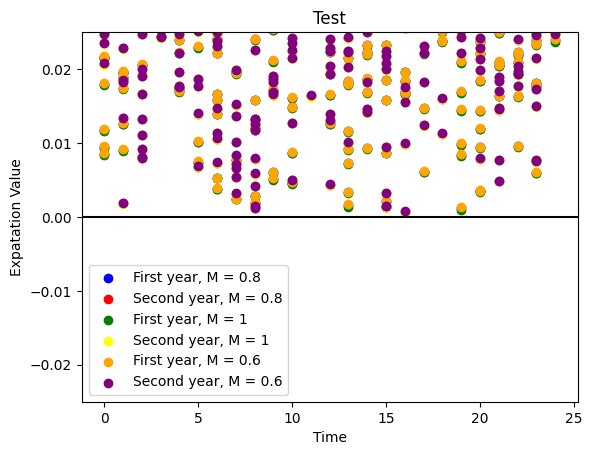

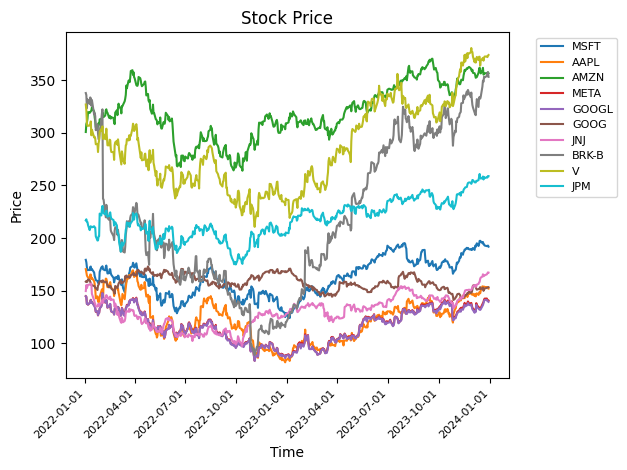

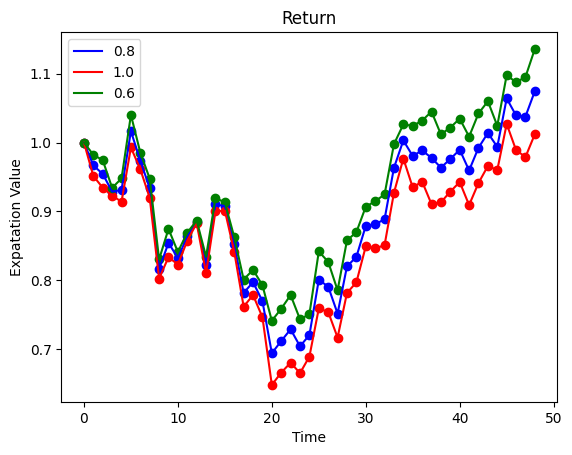

                 Max Drawdown  Log Return  Variances  Sharpe Ratio  \
First Year          -0.317385   -0.328110   0.009209     -1.100304   
Second Year         -0.317385    0.072038   0.010621      0.385106   
First Year M1       -0.352147   -0.372539   0.011207     -1.147822   
Second Year M1      -0.352147    0.012104   0.010306      0.223503   
First Year M06      -0.287487   -0.286840   0.007539     -1.007129   
Second Year M06     -0.287487    0.127506   0.011399      0.551586   

                 Cumulative Rate of Return (%)  
First Year                          -27.971603  
Second Year                           7.469670  
First Year M1                       -31.101717  
Second Year M1                        1.217706  
First Year M06                      -24.936851  
Second Year M06                      13.599163  


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import matplotlib.dates as mdates

# 選擇2022年12月S&P500前十權重的股票
tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
start_date = '2022-01-01'
end_date = '2023-01-01'
data_first_year = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
daily_returns_first_year = data_first_year.pct_change().fillna(method='ffill')
mean_returns_first_year = daily_returns_first_year.mean()
std_returns_first_year = daily_returns_first_year.std()

tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
start_date = '2023-01-01'
end_date = '2024-01-03'
data_second_year = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
daily_returns_second_year = data_second_year.pct_change().fillna(method='ffill')
mean_returns_second_year = daily_returns_second_year.mean()
std_returns_second_year = daily_returns_second_year.std()

tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
start_date = '2022-01-01'
end_date = '2024-01-01'
data_All = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

def brownian(mean, std_dev, data, group_size, M = 0.8, num_paths = 1000):
    np.random.seed(26)
    T = 1.0
    dt = T / len(data.values)
    t = np.linspace(0, T, len(data.values))
    paths = np.zeros((len(tickers),num_paths, len(data.values)))
    predict_return = np.zeros([num_paths, (len(data.values)//group_size), len(tickers)])

    for stock_index in range(len(tickers)):
        paths[stock_index, : , 0] = data.iloc[0, stock_index]
        for i in range(num_paths):
            for j in range(1, len(data.values)):
                dW = np.random.randn() * np.sqrt(dt)
                paths[stock_index,i, j] = paths[stock_index,i, j-1] * np.exp((mean[stock_index] - 0.5 * std_dev[stock_index]**2) * dt + std_dev[stock_index] * dW)
            for k in range(0, len(data.values) - group_size , group_size):
                returns_sum = 0
                for m in range(group_size):
                    returns_sum += (paths[stock_index, i, k + m + 1] - paths[stock_index, i, k + m]) / paths[stock_index, i, k + m]

                predict_return[i, k//group_size, stock_index] = returns_sum / group_size

    x = cp.Variable(len(tickers))
    daily_return_value = [0]*(len(data.values)//group_size)
    daily_return_result = [0]*(len(data.values)//group_size)
    for i in range (len(data.values)//(group_size)):
        constraints = [cp.sum(x) == 1, x >= 0.00000001, x <= M ]
        y = 0
        for j in range(num_paths):
            y += cp.log(1 + (predict_return[j, i, :] @ x))
        objective = cp.Minimize(-1/num_paths * y)
        prob = cp.Problem(objective, constraints)
        result = prob.solve()
        daily_return_value[i] = x.value
        daily_return_result[i] = result

    return daily_return_value, predict_return, paths

def function_point(daily_return_value,predict_return):
    x_data = []
    y_data = []

    for t in range(len(daily_return_value)):
        for j in range(len(tickers)):
            if j == np.argmax(daily_return_value[t]):
                continue
            x_data.append(t)
            y_value = 0
            for k in range(len(predict_return)):
                y_value += (predict_return[k][t][np.argmax(daily_return_value[t])] - predict_return[k][t][j]) / (
                          1 + daily_return_value[t] @ predict_return[k][t])
                # y_value = y_value/len(predict_return)
            y_data.append(y_value)

    return x_data,y_data

def function_line(daily_return_value, group_size, daily_returns, value):
    v = value.copy()
    for i in range(1,len(daily_return_value)):
          R_n = [1] * len(tickers)
          for j in range(len(tickers)):
              for k in range(i*group_size+1,(i+1)*group_size+1):
                  R_n[j] = (1 + daily_returns.values[k][j])*R_n[j]
              R_n[j] = R_n[j] - 1
          v_1 = (1 +(np.dot(daily_return_value[i], R_n))) * v[-1]
          v.append(v_1)
    return v

def check_function(daily_return_value1, daily_return_value2):
    a = 1
    for t in range(len(daily_return_value1)):
        if np.argmax(daily_return_value1[t]) != np.argmax(daily_return_value2[t]):
            print("time:",t)
            print("daily_return_value1",np.argmax(daily_return_value1[t]))
            print("daily_return_value2",np.argmax(daily_return_value2[t]))
            a = 0
    if a == 1:
        print("All correct")

def Cumulative_rate_of_return(y_data):
    Cumulative_rate_of_return = (y_data[-1] - y_data[0])/y_data[0]
    return Cumulative_rate_of_return

def variances(y_data):
    variances = np.var(y_data)
    return variances

def log_return(y_data):
    log_return = np.log(y_data[-1]/y_data[0])
    return log_return

def sharpe_ratio(y_data, risk_free_rate=0):
    daily_returns = [0]*(len(y_data)-1)
    for i in range(len(y_data)-1):
        daily_returns[i] = (y_data[i+1] - y_data[i])/y_data[i]
        (daily_returns[i] - risk_free_rate) / len(y_data)
    excess_returns = np.array(daily_returns)
    mean_excess_return = excess_returns.mean() * len(y_data)
    annual_std = excess_returns.std() * np.sqrt(len(y_data))
    sharpe_ratio = mean_excess_return / annual_std
    return sharpe_ratio

def max_drawdown(y_data):
    y_data = pd.Series(y_data)
    cumulative_max = y_data.cummax()
    drawdown = (y_data - cumulative_max) / cumulative_max
    max_drawdown = drawdown.min()

    return max_drawdown

group_size = 10

daily_return_value_first_year, predict_return_first_year, path_first_year = brownian(mean_returns_first_year, std_returns_first_year, data_first_year, group_size)
daily_return_value_second_year, predict_return_second_year, path_second_year = brownian(mean_returns_second_year, std_returns_second_year, data_second_year, group_size)
daily_return_value_first_year_M1, predict_return_first_year_M1, path_first_year_M1 = brownian(mean_returns_first_year, std_returns_first_year, data_first_year, group_size, M = 1)
daily_return_value_second_year_M1, predict_return_second_year_M1, path_second_year_M1 = brownian(mean_returns_second_year, std_returns_second_year, data_second_year, group_size, M = 1)
daily_return_value_first_year_M06, predict_return_first_year_M06, path_first_year_M06 = brownian(mean_returns_first_year, std_returns_first_year, data_first_year, group_size, M = 0.6)
daily_return_value_second_year_M06, predict_return_second_year_M06, path_second_year_M06 = brownian(mean_returns_second_year, std_returns_second_year, data_second_year, group_size, M = 0.6)

print("Check First year M = 0.8 weight")
check_function(daily_return_value_first_year, daily_return_value_first_year_M1)
print("Check First year M = 0.6 weight")
check_function(daily_return_value_first_year_M06, daily_return_value_first_year_M1)
print("Check Second year M = 0.8 weight")
check_function(daily_return_value_second_year, daily_return_value_second_year_M1)
print("Check Second year M = 0.6 weight")
check_function(daily_return_value_second_year_M06, daily_return_value_second_year_M1)
# print("daily_return_value_first_year",daily_return_value_first_year)
# print("daily_return_value_first_year_M1",daily_return_value_first_year_M1)
# print("daily_return_value_second_year",daily_return_value_second_year)
# print("daily_return_value_second_year_M1",daily_return_value_second_year_M1)

x_data_first_year, y_data_first_year = function_point(daily_return_value_first_year,predict_return_first_year)
x_data_second_year, y_data_second_year = function_point(daily_return_value_second_year,predict_return_second_year)
x_data_first_year_M1, y_data_first_year_M1 = function_point(daily_return_value_first_year_M1,predict_return_first_year_M1)
x_data_second_year_M1, y_data_second_year_M1 = function_point(daily_return_value_second_year_M1,predict_return_second_year_M1)
x_data_first_year_M06, y_data_first_year_M06 = function_point(daily_return_value_first_year_M06,predict_return_first_year_M06)
x_data_second_year_M06, y_data_second_year_M06 = function_point(daily_return_value_second_year_M06,predict_return_second_year_M06)

value_first_year = function_line(daily_return_value_first_year, group_size, daily_returns_first_year, [1])
value_second_year = function_line(daily_return_value_second_year, group_size, daily_returns_second_year, value_first_year)
value_first_year_M1 = function_line(daily_return_value_first_year_M1, group_size, daily_returns_first_year, [1])
value_second_year_M1 = function_line(daily_return_value_second_year_M1, group_size, daily_returns_second_year, value_first_year_M1)
value_first_year_M06 = function_line(daily_return_value_first_year_M06, group_size, daily_returns_first_year, [1])
value_second_year_M06 = function_line(daily_return_value_second_year_M06, group_size, daily_returns_second_year, value_first_year_M06)

plt.scatter(x_data_first_year, y_data_first_year, c='blue', marker='o', label = "First year, M = 0.8")
plt.scatter(x_data_second_year, y_data_second_year, c='red', marker='o', label = "Second year, M = 0.8")
plt.scatter(x_data_first_year_M1, y_data_first_year_M1, c='green', marker='o', label = "First year, M = 1")
plt.scatter(x_data_second_year_M1, y_data_second_year_M1, c='yellow', marker='o', label = "Second year, M = 1")
plt.scatter(x_data_first_year_M06, y_data_first_year_M06, c='orange', marker='o', label = "First year, M = 0.6")
plt.scatter(x_data_second_year_M06, y_data_second_year_M06, c='purple', marker='o', label = "Second year, M = 0.6")
plt.legend()
plt.axhline(y=0, color='black', linestyle='-')
plt.ylim(-0.025, 0.025)
plt.title('Test')
plt.xlabel('Time')
plt.ylabel('Expatation Value')
plt.show()

for i in range(len(tickers)):
    plt.plot(data_All.index, data_All.iloc[:, i], label=tickers[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8)
plt.title('Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right', fontsize=8, fontstyle='normal')
plt.tight_layout()
plt.show()

for i in range(len(value_second_year)):
    plt.plot(i,value_second_year[i], 'bo')
    plt.plot(i,value_second_year_M1[i], 'ro')
    plt.plot(i,value_second_year_M06[i], 'go')
plt.plot(range(len(value_second_year)), value_second_year, 'b-', label = 0.8)
plt.plot(range(len(value_second_year_M1)), value_second_year_M1, 'r-', label = 1.0)
plt.plot(range(len(value_second_year_M06)), value_second_year_M06, 'g-', label = 0.6)
plt.legend()
plt.title('Return')
plt.xlabel('Time')
plt.ylabel('Expatation Value')
plt.show()

# print(len(value_first_year))
# print(len(value_second_year))
# print((value_first_year_M1))
# print((value_second_year_M1))
# print((value_first_year_M06))
# print((value_second_year_M06))
# print("x_data_first_year",x_data_first_year,"y_data_first_year",y_data_first_year)
# print("y_data_second_year",y_data_second_year)

results = {
    'Max Drawdown': [
        max_drawdown(value_first_year),
        max_drawdown(value_second_year),
        max_drawdown(value_first_year_M1),
        max_drawdown(value_second_year_M1),
        max_drawdown(value_first_year_M06),
        max_drawdown(value_second_year_M06)
    ],
    'Log Return': [
        log_return(value_first_year),
        log_return(value_second_year),
        log_return(value_first_year_M1),
        log_return(value_second_year_M1),
        log_return(value_first_year_M06),
        log_return(value_second_year_M06)
    ],
    'Variances': [
        variances(value_first_year),
        variances(value_second_year),
        variances(value_first_year_M1),
        variances(value_second_year_M1),
        variances(value_first_year_M06),
        variances(value_second_year_M06)
    ],
    'Sharpe Ratio': [
        sharpe_ratio(value_first_year),
        sharpe_ratio(value_second_year),
        sharpe_ratio(value_first_year_M1),
        sharpe_ratio(value_second_year_M1),
        sharpe_ratio(value_first_year_M06),
        sharpe_ratio(value_second_year_M06)
    ],
    'Cumulative Rate of Return (%)': [
        Cumulative_rate_of_return(value_first_year) * 100,
        Cumulative_rate_of_return(value_second_year) * 100,
        Cumulative_rate_of_return(value_first_year_M1) * 100,
        Cumulative_rate_of_return(value_second_year_M1) * 100,
        Cumulative_rate_of_return(value_first_year_M06) * 100,
        Cumulative_rate_of_return(value_second_year_M06) * 100
    ]
}
df_results = pd.DataFrame(results, index=['First Year','Second Year','First Year M1','Second Year M1','First Year M06','Second Year M06'])
print(df_results)

[*********************100%***********************]  10 of 10 completed
<ipython-input-3-3b8cae8d0a79>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returns_first_year = data_first_year.pct_change().fillna(method='ffill')
[*********************100%***********************]  10 of 10 completed
<ipython-input-3-3b8cae8d0a79>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returns_second_year = data_second_year.pct_change().fillna(method='ffill')
[*********************100%***********************]  10 of 10 completed
<ipython-input-3-3b8cae8d0a79>:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  paths[stock_

stock_index 0 num_paths 4999
stock_index 1 num_paths 4999
stock_index 2 num_paths 4999
stock_index 3 num_paths 4999
stock_index 4 num_paths 4999
stock_index 5 num_paths 4999
stock_index 6 num_paths 4999
stock_index 7 num_paths 4999
stock_index 8 num_paths 4999
stock_index 9 num_paths 4999


/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:158: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "
/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


stock_index 0 num_paths 4999
stock_index 1 num_paths 4999
stock_index 2 num_paths 4999
stock_index 3 num_paths 4999
stock_index 4 num_paths 4999
stock_index 5 num_paths 4999
stock_index 6 num_paths 4999
stock_index 7 num_paths 4999
stock_index 8 num_paths 4999
stock_index 9 num_paths 4999
stock_index 0 num_paths 4999
stock_index 1 num_paths 4999
stock_index 2 num_paths 4999
stock_index 3 num_paths 4999
stock_index 4 num_paths 4999
stock_index 5 num_paths 4999
stock_index 6 num_paths 4999
stock_index 7 num_paths 4999
stock_index 8 num_paths 4999
stock_index 9 num_paths 4999
stock_index 0 num_paths 4999
stock_index 1 num_paths 4999
stock_index 2 num_paths 4999
stock_index 3 num_paths 4999
stock_index 4 num_paths 4999
stock_index 5 num_paths 4999
stock_index 6 num_paths 4999
stock_index 7 num_paths 4999
stock_index 8 num_paths 4999
stock_index 9 num_paths 4999
stock_index 0 num_paths 4999
stock_index 1 num_paths 4999
stock_index 2 num_paths 4999
stock_index 3 num_paths 4999
stock_index 4 

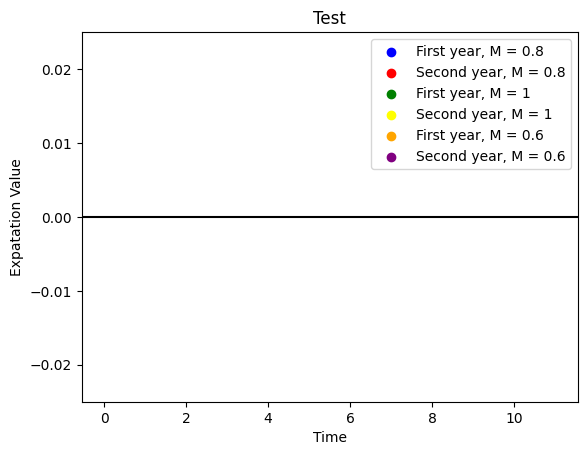

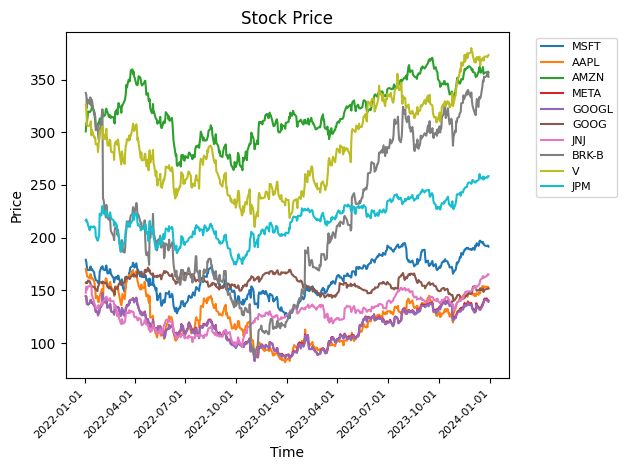

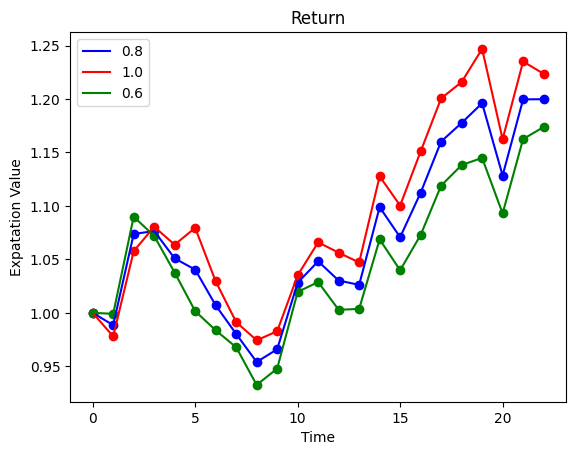

                 Max Drawdown  Log Return  Variances  Sharpe Ratio  \
First Year          -0.113776    0.047066   0.001557      0.462933   
Second Year         -0.113776    0.182203   0.005662      1.156747   
First Year M1       -0.098259    0.063887   0.001552      0.605778   
Second Year M1      -0.098259    0.201812   0.007370      1.224461   
First Year M06      -0.144390    0.028393   0.001994      0.286542   
Second Year M06     -0.144390    0.160243   0.004481      1.004649   

                 Cumulative Rate of Return (%)  
First Year                            4.819105  
Second Year                          19.985795  
First Year M1                         6.597200  
Second Year M1                       22.361792  
First Year M06                        2.880036  
Second Year M06                      17.379657  


In [ ]:
#最終版本 有年化
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import matplotlib.dates as mdates

# 選擇2022年12月S&P500前十權重的股票
tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
start_date = '2022-01-01'
end_date = '2023-01-01'
data_first_year = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
daily_returns_first_year = data_first_year.pct_change().fillna(method='ffill')
mean_returns_first_year = daily_returns_first_year.mean()
std_returns_first_year = daily_returns_first_year.std()

tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
start_date = '2023-01-01'
end_date = '2024-01-03'
data_second_year = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
daily_returns_second_year = data_second_year.pct_change().fillna(method='ffill')
mean_returns_second_year = daily_returns_second_year.mean()
std_returns_second_year = daily_returns_second_year.std()

tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
start_date = '2022-01-01'
end_date = '2024-01-01'
data_All = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']

def brownian(mean, std_dev, data, group_size, M = 0.8, num_paths = 5000):
    np.random.seed()
    T = 1.0
    dt = T / len(data.values)
    t = np.linspace(0, T, len(data.values))
    paths = np.zeros((len(tickers),num_paths, len(data.values)))
    predict_return = np.zeros([num_paths, (len(data.values)//group_size), len(tickers)])

    for stock_index in range(len(tickers)):
        paths[stock_index, : , 0] = data.iloc[0, stock_index]
        for i in range(num_paths):
            # mean = (1 + mean[stock_index]) ** 252 - 1
            # std_dev = std_dev[stock_index] * np.sqrt(252)
            for j in range(1, len(data.values)):
                dW = np.random.randn() * np.sqrt(dt)
                paths[stock_index,i, j] = paths[stock_index,i, j-1] * np.exp((((1 + mean[stock_index]) ** 252 - 1) - 0.5 * std_dev[stock_index] * np.sqrt(252)**2) * dt + std_dev[stock_index] * np.sqrt(252) * dW)
            for k in range(0, len(data.values) - group_size , group_size):
                returns_sum = 0
                for m in range(group_size):
                    returns_sum += (paths[stock_index, i, k + m + 1] - paths[stock_index, i, k + m]) / paths[stock_index, i, k + m]

                predict_return[i, k//group_size, stock_index] = returns_sum / group_size
        print("stock_index",stock_index,"num_paths",i)

    x = cp.Variable(len(tickers))
    daily_return_value = [0]*(len(data.values)//group_size)
    daily_return_result = [0]*(len(data.values)//group_size)
    for i in range (len(data.values)//(group_size)):
        constraints = [cp.sum(x) == 1, x >= 0.00000001, x <= M ]
        y = 0
        for j in range(num_paths):
            y += cp.log(1 + (predict_return[j, i, :] @ x))
        objective = cp.Minimize(-1/num_paths * y)
        prob = cp.Problem(objective, constraints)
        result = prob.solve()
        daily_return_value[i] = x.value
        daily_return_result[i] = result

    return daily_return_value, predict_return, paths

def function_point(daily_return_value,predict_return):
    x_data = []
    y_data = []

    for t in range(len(daily_return_value)):
        for j in range(len(tickers)):
            if j == np.argmax(daily_return_value[t]):
                continue
            x_data.append(t)
            y_value = 0
            for k in range(len(predict_return)):
                y_value += (predict_return[k][t][np.argmax(daily_return_value[t])] - predict_return[k][t][j]) / (
                          1 + daily_return_value[t] @ predict_return[k][t])
                # y_value = y_value/len(predict_return)
            y_data.append(y_value)

    return x_data,y_data

def function_line(daily_return_value, group_size, daily_returns, value):
    v = value.copy()
    for i in range(1,len(daily_return_value)):
          R_n = [1] * len(tickers)
          for j in range(len(tickers)):
              for k in range(i*group_size+1,(i+1)*group_size+1):
                  R_n[j] = (1 + daily_returns.values[k][j])*R_n[j]
              R_n[j] = R_n[j] - 1
          v_1 = (1 +(np.dot(daily_return_value[i], R_n))) * v[-1]
          v.append(v_1)
    return v

def check_function(daily_return_value1, daily_return_value2):
    a = 1
    for t in range(len(daily_return_value1)):
        if np.argmax(daily_return_value1[t]) != np.argmax(daily_return_value2[t]):
            print("time:",t)
            print("daily return value1",np.argmax(daily_return_value1[t]))
            print("daily return correct value",np.argmax(daily_return_value2[t]))
            a = 0
    if a == 1:
        print("All correct")

def Cumulative_rate_of_return(y_data):
    Cumulative_rate_of_return = (y_data[-1] - y_data[0])/y_data[0]
    return Cumulative_rate_of_return

def variances(y_data):
    variances = np.var(y_data)
    return variances

def log_return(y_data):
    log_return = np.log(y_data[-1]/y_data[0])
    return log_return

def sharpe_ratio(y_data, risk_free_rate=0):
    daily_returns = [0]*(len(y_data)-1)
    for i in range(len(y_data)-1):
        daily_returns[i] = (y_data[i+1] - y_data[i])/y_data[i]
        (daily_returns[i] - risk_free_rate) / len(y_data)
    excess_returns = np.array(daily_returns)
    mean_excess_return = excess_returns.mean() * len(y_data)
    annual_std = excess_returns.std() * np.sqrt(len(y_data))
    sharpe_ratio = mean_excess_return / annual_std
    return sharpe_ratio

def max_drawdown(y_data):
    y_data = pd.Series(y_data)
    cumulative_max = y_data.cummax()
    drawdown = (y_data - cumulative_max) / cumulative_max
    max_drawdown = drawdown.min()

    return max_drawdown

group_size = 20

daily_return_value_first_year, predict_return_first_year, path_first_year = brownian(mean_returns_first_year, std_returns_first_year, data_first_year, group_size)
daily_return_value_second_year, predict_return_second_year, path_second_year = brownian(mean_returns_second_year, std_returns_second_year, data_second_year, group_size)
daily_return_value_first_year_M1, predict_return_first_year_M1, path_first_year_M1 = brownian(mean_returns_first_year, std_returns_first_year, data_first_year, group_size, M = 1)
daily_return_value_second_year_M1, predict_return_second_year_M1, path_second_year_M1 = brownian(mean_returns_second_year, std_returns_second_year, data_second_year, group_size, M = 1)
daily_return_value_first_year_M06, predict_return_first_year_M06, path_first_year_M06 = brownian(mean_returns_first_year, std_returns_first_year, data_first_year, group_size, M = 0.6)
daily_return_value_second_year_M06, predict_return_second_year_M06, path_second_year_M06 = brownian(mean_returns_second_year, std_returns_second_year, data_second_year, group_size, M = 0.6)

print("Check First year M = 0.8 weight")
check_function(daily_return_value_first_year, daily_return_value_first_year_M1)
print("Check First year M = 0.6 weight")
check_function(daily_return_value_first_year_M06, daily_return_value_first_year_M1)
print("Check Second year M = 0.8 weight")
check_function(daily_return_value_second_year, daily_return_value_second_year_M1)
print("Check Second year M = 0.6 weight")
check_function(daily_return_value_second_year_M06, daily_return_value_second_year_M1)
# print("daily_return_value_first_year",daily_return_value_first_year)
# print("daily_return_value_first_year_M1",daily_return_value_first_year_M1)
# print("daily_return_value_second_year",daily_return_value_second_year)
# print("daily_return_value_second_year_M1",daily_return_value_second_year_M1)

x_data_first_year, y_data_first_year = function_point(daily_return_value_first_year,predict_return_first_year)
x_data_second_year, y_data_second_year = function_point(daily_return_value_second_year,predict_return_second_year)
x_data_first_year_M1, y_data_first_year_M1 = function_point(daily_return_value_first_year_M1,predict_return_first_year_M1)
x_data_second_year_M1, y_data_second_year_M1 = function_point(daily_return_value_second_year_M1,predict_return_second_year_M1)
x_data_first_year_M06, y_data_first_year_M06 = function_point(daily_return_value_first_year_M06,predict_return_first_year_M06)
x_data_second_year_M06, y_data_second_year_M06 = function_point(daily_return_value_second_year_M06,predict_return_second_year_M06)

value_first_year = function_line(daily_return_value_first_year, group_size, daily_returns_first_year, [1])
value_second_year = function_line(daily_return_value_second_year, group_size, daily_returns_second_year, value_first_year)
value_first_year_M1 = function_line(daily_return_value_first_year_M1, group_size, daily_returns_first_year, [1])
value_second_year_M1 = function_line(daily_return_value_second_year_M1, group_size, daily_returns_second_year, value_first_year_M1)
value_first_year_M06 = function_line(daily_return_value_first_year_M06, group_size, daily_returns_first_year, [1])
value_second_year_M06 = function_line(daily_return_value_second_year_M06, group_size, daily_returns_second_year, value_first_year_M06)

plt.scatter(x_data_first_year, y_data_first_year, c='blue', marker='o', label = "First year, M = 0.8")
plt.scatter(x_data_second_year, y_data_second_year, c='red', marker='o', label = "Second year, M = 0.8")
plt.scatter(x_data_first_year_M1, y_data_first_year_M1, c='green', marker='o', label = "First year, M = 1")
plt.scatter(x_data_second_year_M1, y_data_second_year_M1, c='yellow', marker='o', label = "Second year, M = 1")
plt.scatter(x_data_first_year_M06, y_data_first_year_M06, c='orange', marker='o', label = "First year, M = 0.6")
plt.scatter(x_data_second_year_M06, y_data_second_year_M06, c='purple', marker='o', label = "Second year, M = 0.6")
plt.legend()
plt.axhline(y=0, color='black', linestyle='-')
plt.ylim(-0.025, 0.025)
plt.title('Test')
plt.xlabel('Time')
plt.ylabel('Expatation Value')
plt.show()

for i in range(len(tickers)):
    plt.plot(data_All.index, data_All.iloc[:, i], label=tickers[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8)
plt.title('Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right', fontsize=8, fontstyle='normal')
plt.tight_layout()
plt.show()

for i in range(len(value_second_year)):
    plt.plot(i,value_second_year[i], 'bo')
    plt.plot(i,value_second_year_M1[i], 'ro')
    plt.plot(i,value_second_year_M06[i], 'go')
plt.plot(range(len(value_second_year)), value_second_year, 'b-', label = 0.8)
plt.plot(range(len(value_second_year_M1)), value_second_year_M1, 'r-', label = 1.0)
plt.plot(range(len(value_second_year_M06)), value_second_year_M06, 'g-', label = 0.6)
plt.legend()
plt.title('Return')
plt.xlabel('Time')
plt.ylabel('Expatation Value')
plt.show()

# print(len(value_first_year))
# print(len(value_second_year))
# print((value_first_year_M1))
# print((value_second_year_M1))
# print((value_first_year_M06))
# print((value_second_year_M06))
# print("x_data_first_year",x_data_first_year,"y_data_first_year",y_data_first_year)
# print("y_data_second_year",y_data_second_year)

results = {
    'Max Drawdown': [
        max_drawdown(value_first_year),
        max_drawdown(value_second_year),
        max_drawdown(value_first_year_M1),
        max_drawdown(value_second_year_M1),
        max_drawdown(value_first_year_M06),
        max_drawdown(value_second_year_M06)
    ],
    'Log Return': [
        log_return(value_first_year),
        log_return(value_second_year),
        log_return(value_first_year_M1),
        log_return(value_second_year_M1),
        log_return(value_first_year_M06),
        log_return(value_second_year_M06)
    ],
    'Variances': [
        variances(value_first_year),
        variances(value_second_year),
        variances(value_first_year_M1),
        variances(value_second_year_M1),
        variances(value_first_year_M06),
        variances(value_second_year_M06)
    ],
    'Sharpe Ratio': [
        sharpe_ratio(value_first_year),
        sharpe_ratio(value_second_year),
        sharpe_ratio(value_first_year_M1),
        sharpe_ratio(value_second_year_M1),
        sharpe_ratio(value_first_year_M06),
        sharpe_ratio(value_second_year_M06)
    ],
    'Cumulative Rate of Return (%)': [
        Cumulative_rate_of_return(value_first_year) * 100,
        Cumulative_rate_of_return(value_second_year) * 100,
        Cumulative_rate_of_return(value_first_year_M1) * 100,
        Cumulative_rate_of_return(value_second_year_M1) * 100,
        Cumulative_rate_of_return(value_first_year_M06) * 100,
        Cumulative_rate_of_return(value_second_year_M06) * 100
    ]
}
df_results = pd.DataFrame(results, index=['First Year','Second Year','First Year M1','Second Year M1','First Year M06','Second Year M06'])
print(df_results)

[*********************100%***********************]  10 of 10 completed
<ipython-input-1-d7652902f163>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returns_first_year = data_first_year.pct_change().fillna(method='ffill')
[*********************100%***********************]  10 of 10 completed
<ipython-input-1-d7652902f163>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returns_second_year = data_second_year.pct_change().fillna(method='ffill')
[*********************100%***********************]  10 of 10 completed
<ipython-input-1-d7652902f163>:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  paths[stock_

stock_index 0 num_paths 4999
stock_index 1 num_paths 4999
stock_index 2 num_paths 4999
stock_index 3 num_paths 4999
stock_index 4 num_paths 4999
stock_index 5 num_paths 4999
stock_index 6 num_paths 4999
stock_index 7 num_paths 4999
stock_index 8 num_paths 4999
stock_index 9 num_paths 4999


/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:158: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "
/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


stock_index 0 num_paths 4999
stock_index 1 num_paths 4999
stock_index 2 num_paths 4999
stock_index 3 num_paths 4999
stock_index 4 num_paths 4999
stock_index 5 num_paths 4999
stock_index 6 num_paths 4999
stock_index 7 num_paths 4999
stock_index 8 num_paths 4999
stock_index 9 num_paths 4999
stock_index 0 num_paths 4999
stock_index 1 num_paths 4999
stock_index 2 num_paths 4999
stock_index 3 num_paths 4999
stock_index 4 num_paths 4999
stock_index 5 num_paths 4999
stock_index 6 num_paths 4999
stock_index 7 num_paths 4999
stock_index 8 num_paths 4999
stock_index 9 num_paths 4999
stock_index 0 num_paths 4999
stock_index 1 num_paths 4999
stock_index 2 num_paths 4999
stock_index 3 num_paths 4999
stock_index 4 num_paths 4999
stock_index 5 num_paths 4999
stock_index 6 num_paths 4999
stock_index 7 num_paths 4999
stock_index 8 num_paths 4999
stock_index 9 num_paths 4999
stock_index 0 num_paths 4999
stock_index 1 num_paths 4999
stock_index 2 num_paths 4999
stock_index 3 num_paths 4999
stock_index 4 

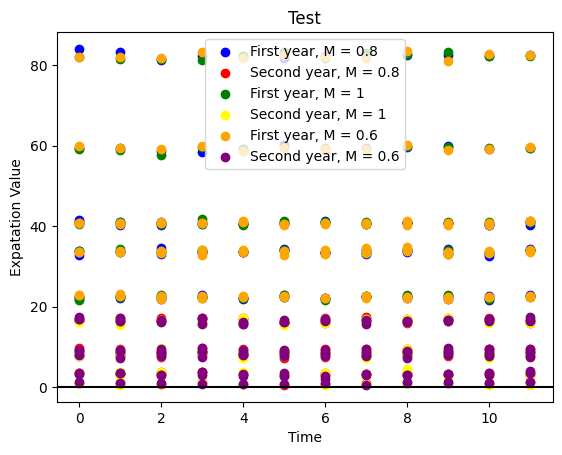

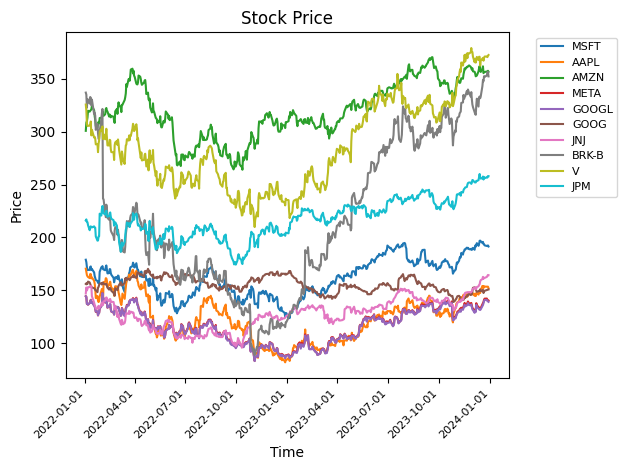

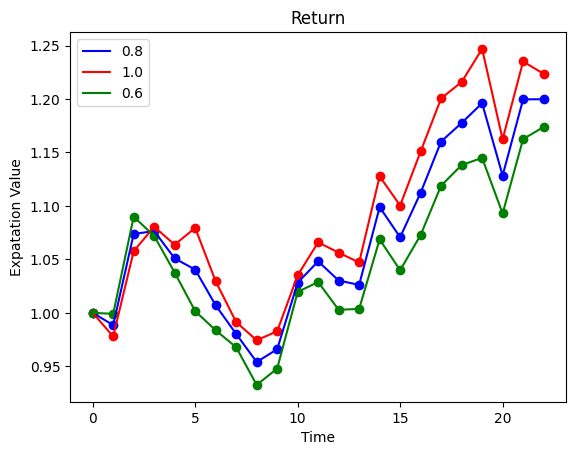

                 Max Drawdown  Log Return  Variances  Sharpe Ratio  \
First Year          -0.113776    0.047066   0.001557      0.462933   
Second Year         -0.113776    0.182203   0.005662      1.156748   
First Year M1       -0.098259    0.063887   0.001552      0.605778   
Second Year M1      -0.098259    0.201812   0.007370      1.224461   
First Year M06      -0.144390    0.028393   0.001994      0.286542   
Second Year M06     -0.144390    0.160243   0.004481      1.004650   

                 Cumulative Rate of Return (%)  
First Year                            4.819106  
Second Year                          19.985794  
First Year M1                         6.597201  
Second Year M1                       22.361793  
First Year M06                        2.880037  
Second Year M06                      17.379654  


In [ ]:
#最終版本 有年化
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import matplotlib.dates as mdates

# 選擇2022年12月S&P500前十權重的股票
tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
start_date = '2022-01-01'
end_date = '2023-01-01'
data_first_year = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
daily_returns_first_year = data_first_year.pct_change().fillna(method='ffill')
mean_returns_first_year = daily_returns_first_year.mean()
std_returns_first_year = daily_returns_first_year.std()

tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
start_date = '2023-01-01'
end_date = '2024-01-03'
data_second_year = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
daily_returns_second_year = data_second_year.pct_change().fillna(method='ffill')
mean_returns_second_year = daily_returns_second_year.mean()
std_returns_second_year = daily_returns_second_year.std()

tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
start_date = '2022-01-01'
end_date = '2024-01-01'
data_All = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']

def brownian(mean, std_dev, data, group_size, M = 0.8, num_paths = 5000):
    np.random.seed()
    T = 1.0
    dt = T / len(data.values)
    t = np.linspace(0, T, len(data.values))
    paths = np.zeros((len(tickers),num_paths, len(data.values)))
    predict_return = np.zeros([num_paths, (len(data.values)//group_size), len(tickers)])

    for stock_index in range(len(tickers)):
        paths[stock_index, : , 0] = data.iloc[0, stock_index]
        for i in range(num_paths):
            # mean = (1 + mean[stock_index]) ** 252 - 1
            # std_dev = std_dev[stock_index] * np.sqrt(252)
            for j in range(1, len(data.values)):
                dW = np.random.randn() * np.sqrt(dt)
                paths[stock_index,i, j] = paths[stock_index,i, j-1] * np.exp((((1 + mean[stock_index]) ** 252 - 1) - 0.5 * std_dev[stock_index] * np.sqrt(252)**2) * dt + std_dev[stock_index] * np.sqrt(252) * dW)
            for k in range(0, len(data.values) - group_size , group_size):
                returns_sum = 0
                for m in range(group_size):
                    returns_sum += (paths[stock_index, i, k + m + 1] - paths[stock_index, i, k + m]) / paths[stock_index, i, k + m]

                predict_return[i, k//group_size, stock_index] = returns_sum / group_size
        print("stock_index",stock_index,"num_paths",i)

    x = cp.Variable(len(tickers))
    daily_return_value = [0]*(len(data.values)//group_size)
    daily_return_result = [0]*(len(data.values)//group_size)
    for i in range (len(data.values)//(group_size)):
        constraints = [cp.sum(x) == 1, x >= 0.00000001, x <= M ]
        y = 0
        for j in range(num_paths):
            y += cp.log(1 + (predict_return[j, i, :] @ x))
        objective = cp.Minimize(-1/num_paths * y)
        prob = cp.Problem(objective, constraints)
        result = prob.solve()
        daily_return_value[i] = x.value
        daily_return_result[i] = result

    return daily_return_value, predict_return, paths

def function_point(daily_return_value,predict_return):
    x_data = []
    y_data = []

    for t in range(len(daily_return_value)):
        for j in range(len(tickers)):
            if j == np.argmax(daily_return_value[t]):
                continue
            x_data.append(t)
            y_value = 0
            for k in range(len(predict_return)):
                y_value += (predict_return[k][t][np.argmax(daily_return_value[t])] - predict_return[k][t][j]) / (
                          1 + daily_return_value[t] @ predict_return[k][t])
                # y_value = y_value/len(predict_return)
            y_data.append(y_value)

    return x_data,y_data

def function_line(daily_return_value, group_size, daily_returns, value):
    v = value.copy()
    for i in range(1,len(daily_return_value)):
          R_n = [1] * len(tickers)
          for j in range(len(tickers)):
              for k in range(i*group_size+1,(i+1)*group_size+1):
                  R_n[j] = (1 + daily_returns.values[k][j])*R_n[j]
              R_n[j] = R_n[j] - 1
          v_1 = (1 +(np.dot(daily_return_value[i], R_n))) * v[-1]
          v.append(v_1)
    return v

def check_function(daily_return_value1, daily_return_value2):
    a = 1
    for t in range(len(daily_return_value1)):
        if np.argmax(daily_return_value1[t]) != np.argmax(daily_return_value2[t]):
            print("time:",t)
            print("daily return value1",np.argmax(daily_return_value1[t]))
            print("daily return correct value",np.argmax(daily_return_value2[t]))
            a = 0
    if a == 1:
        print("All correct")

def Cumulative_rate_of_return(y_data):
    Cumulative_rate_of_return = (y_data[-1] - y_data[0])/y_data[0]
    return Cumulative_rate_of_return

def variances(y_data):
    variances = np.var(y_data)
    return variances

def log_return(y_data):
    log_return = np.log(y_data[-1]/y_data[0])
    return log_return

def sharpe_ratio(y_data, risk_free_rate=0):
    daily_returns = [0]*(len(y_data)-1)
    for i in range(len(y_data)-1):
        daily_returns[i] = (y_data[i+1] - y_data[i])/y_data[i]
        (daily_returns[i] - risk_free_rate) / len(y_data)
    excess_returns = np.array(daily_returns)
    mean_excess_return = excess_returns.mean() * len(y_data)
    annual_std = excess_returns.std() * np.sqrt(len(y_data))
    sharpe_ratio = mean_excess_return / annual_std
    return sharpe_ratio

def max_drawdown(y_data):
    y_data = pd.Series(y_data)
    cumulative_max = y_data.cummax()
    drawdown = (y_data - cumulative_max) / cumulative_max
    max_drawdown = drawdown.min()

    return max_drawdown

group_size = 20

daily_return_value_first_year, predict_return_first_year, path_first_year = brownian(mean_returns_first_year, std_returns_first_year, data_first_year, group_size)
daily_return_value_second_year, predict_return_second_year, path_second_year = brownian(mean_returns_second_year, std_returns_second_year, data_second_year, group_size)
daily_return_value_first_year_M1, predict_return_first_year_M1, path_first_year_M1 = brownian(mean_returns_first_year, std_returns_first_year, data_first_year, group_size, M = 1)
daily_return_value_second_year_M1, predict_return_second_year_M1, path_second_year_M1 = brownian(mean_returns_second_year, std_returns_second_year, data_second_year, group_size, M = 1)
daily_return_value_first_year_M06, predict_return_first_year_M06, path_first_year_M06 = brownian(mean_returns_first_year, std_returns_first_year, data_first_year, group_size, M = 0.6)
daily_return_value_second_year_M06, predict_return_second_year_M06, path_second_year_M06 = brownian(mean_returns_second_year, std_returns_second_year, data_second_year, group_size, M = 0.6)

print("Check First year M = 0.8 weight")
check_function(daily_return_value_first_year, daily_return_value_first_year_M1)
print("Check First year M = 0.6 weight")
check_function(daily_return_value_first_year_M06, daily_return_value_first_year_M1)
print("Check Second year M = 0.8 weight")
check_function(daily_return_value_second_year, daily_return_value_second_year_M1)
print("Check Second year M = 0.6 weight")
check_function(daily_return_value_second_year_M06, daily_return_value_second_year_M1)
# print("daily_return_value_first_year",daily_return_value_first_year)
# print("daily_return_value_first_year_M1",daily_return_value_first_year_M1)
# print("daily_return_value_second_year",daily_return_value_second_year)
# print("daily_return_value_second_year_M1",daily_return_value_second_year_M1)

x_data_first_year, y_data_first_year = function_point(daily_return_value_first_year,predict_return_first_year)
x_data_second_year, y_data_second_year = function_point(daily_return_value_second_year,predict_return_second_year)
x_data_first_year_M1, y_data_first_year_M1 = function_point(daily_return_value_first_year_M1,predict_return_first_year_M1)
x_data_second_year_M1, y_data_second_year_M1 = function_point(daily_return_value_second_year_M1,predict_return_second_year_M1)
x_data_first_year_M06, y_data_first_year_M06 = function_point(daily_return_value_first_year_M06,predict_return_first_year_M06)
x_data_second_year_M06, y_data_second_year_M06 = function_point(daily_return_value_second_year_M06,predict_return_second_year_M06)

value_first_year = function_line(daily_return_value_first_year, group_size, daily_returns_first_year, [1])
value_second_year = function_line(daily_return_value_second_year, group_size, daily_returns_second_year, value_first_year)
value_first_year_M1 = function_line(daily_return_value_first_year_M1, group_size, daily_returns_first_year, [1])
value_second_year_M1 = function_line(daily_return_value_second_year_M1, group_size, daily_returns_second_year, value_first_year_M1)
value_first_year_M06 = function_line(daily_return_value_first_year_M06, group_size, daily_returns_first_year, [1])
value_second_year_M06 = function_line(daily_return_value_second_year_M06, group_size, daily_returns_second_year, value_first_year_M06)

plt.scatter(x_data_first_year, y_data_first_year, c='blue', marker='o', label = "First year, M = 0.8")
plt.scatter(x_data_second_year, y_data_second_year, c='red', marker='o', label = "Second year, M = 0.8")
plt.scatter(x_data_first_year_M1, y_data_first_year_M1, c='green', marker='o', label = "First year, M = 1")
plt.scatter(x_data_second_year_M1, y_data_second_year_M1, c='yellow', marker='o', label = "Second year, M = 1")
plt.scatter(x_data_first_year_M06, y_data_first_year_M06, c='orange', marker='o', label = "First year, M = 0.6")
plt.scatter(x_data_second_year_M06, y_data_second_year_M06, c='purple', marker='o', label = "Second year, M = 0.6")
plt.legend()
plt.axhline(y=0, color='black', linestyle='-')
# plt.ylim(-0.025, 0.025)
plt.title('Test')
plt.xlabel('Time')
plt.ylabel('Expatation Value')
plt.show()

for i in range(len(tickers)):
    plt.plot(data_All.index, data_All.iloc[:, i], label=tickers[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8)
plt.title('Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right', fontsize=8, fontstyle='normal')
plt.tight_layout()
plt.show()

for i in range(len(value_second_year)):
    plt.plot(i,value_second_year[i], 'bo')
    plt.plot(i,value_second_year_M1[i], 'ro')
    plt.plot(i,value_second_year_M06[i], 'go')
plt.plot(range(len(value_second_year)), value_second_year, 'b-', label = 0.8)
plt.plot(range(len(value_second_year_M1)), value_second_year_M1, 'r-', label = 1.0)
plt.plot(range(len(value_second_year_M06)), value_second_year_M06, 'g-', label = 0.6)
plt.legend()
plt.title('Return')
plt.xlabel('Time')
plt.ylabel('Expatation Value')
plt.show()

# print(len(value_first_year))
# print(len(value_second_year))
# print((value_first_year_M1))
# print((value_second_year_M1))
# print((value_first_year_M06))
# print((value_second_year_M06))
# print("x_data_first_year",x_data_first_year,"y_data_first_year",y_data_first_year)
# print("y_data_second_year",y_data_second_year)

results = {
    'Max Drawdown': [
        max_drawdown(value_first_year),
        max_drawdown(value_second_year),
        max_drawdown(value_first_year_M1),
        max_drawdown(value_second_year_M1),
        max_drawdown(value_first_year_M06),
        max_drawdown(value_second_year_M06)
    ],
    'Log Return': [
        log_return(value_first_year),
        log_return(value_second_year),
        log_return(value_first_year_M1),
        log_return(value_second_year_M1),
        log_return(value_first_year_M06),
        log_return(value_second_year_M06)
    ],
    'Variances': [
        variances(value_first_year),
        variances(value_second_year),
        variances(value_first_year_M1),
        variances(value_second_year_M1),
        variances(value_first_year_M06),
        variances(value_second_year_M06)
    ],
    'Sharpe Ratio': [
        sharpe_ratio(value_first_year),
        sharpe_ratio(value_second_year),
        sharpe_ratio(value_first_year_M1),
        sharpe_ratio(value_second_year_M1),
        sharpe_ratio(value_first_year_M06),
        sharpe_ratio(value_second_year_M06)
    ],
    'Cumulative Rate of Return (%)': [
        Cumulative_rate_of_return(value_first_year) * 100,
        Cumulative_rate_of_return(value_second_year) * 100,
        Cumulative_rate_of_return(value_first_year_M1) * 100,
        Cumulative_rate_of_return(value_second_year_M1) * 100,
        Cumulative_rate_of_return(value_first_year_M06) * 100,
        Cumulative_rate_of_return(value_second_year_M06) * 100
    ]
}
df_results = pd.DataFrame(results, index=['First Year','Second Year','First Year M1','Second Year M1','First Year M06','Second Year M06'])
print(df_results)

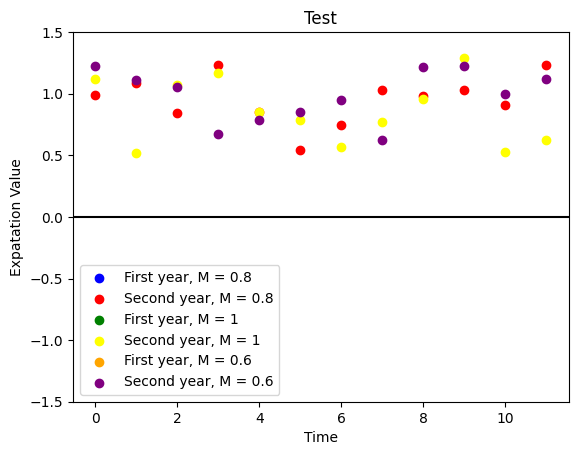

In [ ]:
plt.scatter(x_data_first_year, y_data_first_year, c='blue', marker='o', label = "First year, M = 0.8")
plt.scatter(x_data_second_year, y_data_second_year, c='red', marker='o', label = "Second year, M = 0.8")
plt.scatter(x_data_first_year_M1, y_data_first_year_M1, c='green', marker='o', label = "First year, M = 1")
plt.scatter(x_data_second_year_M1, y_data_second_year_M1, c='yellow', marker='o', label = "Second year, M = 1")
plt.scatter(x_data_first_year_M06, y_data_first_year_M06, c='orange', marker='o', label = "First year, M = 0.6")
plt.scatter(x_data_second_year_M06, y_data_second_year_M06, c='purple', marker='o', label = "Second year, M = 0.6")
plt.legend()
plt.axhline(y=0, color='black', linestyle='-')
plt.ylim(-1.5, 1.5)
plt.title('Test')
plt.xlabel('Time')
plt.ylabel('Expatation Value')
plt.show()

[*********************100%***********************]  10 of 10 completed
<ipython-input-6-5291deaa2e4f>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returns_first_year = data_first_year.pct_change().fillna(method='ffill')
[*********************100%***********************]  10 of 10 completed
<ipython-input-6-5291deaa2e4f>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returns_second_year = data_second_year.pct_change().fillna(method='ffill')
[*********************100%***********************]  10 of 10 completed
<ipython-input-6-5291deaa2e4f>:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  paths[stock_

stock_index 0 num_paths 4999
stock_index 1 num_paths 4999
stock_index 2 num_paths 4999
stock_index 3 num_paths 4999
stock_index 4 num_paths 4999
stock_index 5 num_paths 4999
stock_index 6 num_paths 4999
stock_index 7 num_paths 4999
stock_index 8 num_paths 4999
stock_index 9 num_paths 4999
stock_index 0 num_paths 4999
stock_index 1 num_paths 4999
stock_index 2 num_paths 4999
stock_index 3 num_paths 4999
stock_index 4 num_paths 4999
stock_index 5 num_paths 4999
stock_index 6 num_paths 4999
stock_index 7 num_paths 4999
stock_index 8 num_paths 4999
stock_index 9 num_paths 4999
stock_index 0 num_paths 4999
stock_index 1 num_paths 4999
stock_index 2 num_paths 4999
stock_index 3 num_paths 4999
stock_index 4 num_paths 4999
stock_index 5 num_paths 4999
stock_index 6 num_paths 4999
stock_index 7 num_paths 4999
stock_index 8 num_paths 4999
stock_index 9 num_paths 4999
stock_index 0 num_paths 4999
stock_index 1 num_paths 4999
stock_index 2 num_paths 4999
stock_index 3 num_paths 4999
stock_index 4 

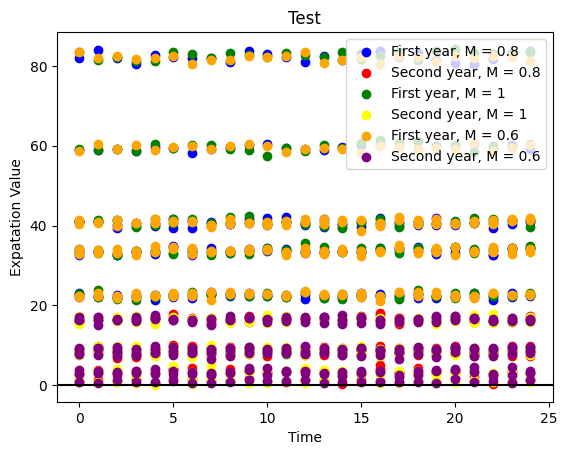

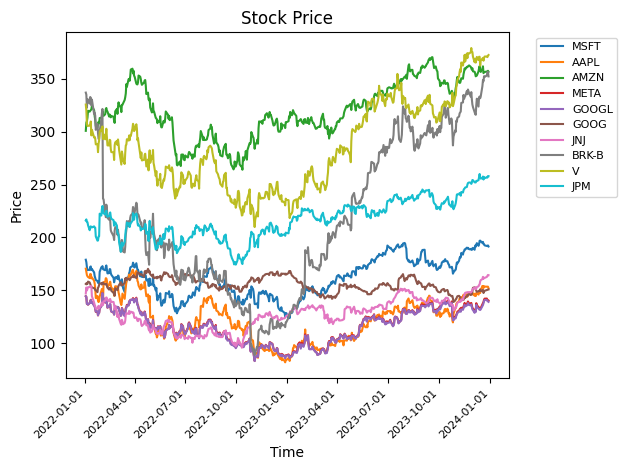

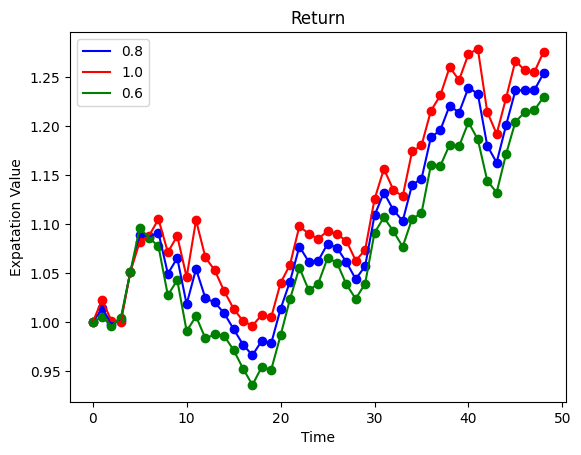

                 Max Drawdown  Log Return  Variances  Sharpe Ratio  \
First Year          -0.114502    0.060608   0.001386      0.582587   
Second Year         -0.114502    0.225964   0.007180      1.532187   
First Year M1       -0.098260    0.081507   0.001384      0.734322   
Second Year M1      -0.098260    0.243341   0.008024      1.574705   
First Year M06      -0.145909    0.038421   0.001766      0.379905   
Second Year M06     -0.145909    0.206604   0.006548      1.373415   

                 Cumulative Rate of Return (%)  
First Year                            6.248218  
Second Year                          25.353038  
First Year M1                         8.492081  
Second Year M1                       27.550320  
First Year M06                        3.916902  
Second Year M06                      22.949567  


In [ ]:
#最終版本 有年化
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import matplotlib.dates as mdates

# 選擇2022年12月S&P500前十權重的股票
tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
start_date = '2022-01-01'
end_date = '2023-01-01'
data_first_year = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
daily_returns_first_year = data_first_year.pct_change().fillna(method='ffill')
mean_returns_first_year = daily_returns_first_year.mean()
std_returns_first_year = daily_returns_first_year.std()

tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
start_date = '2023-01-01'
end_date = '2024-01-03'
data_second_year = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
daily_returns_second_year = data_second_year.pct_change().fillna(method='ffill')
mean_returns_second_year = daily_returns_second_year.mean()
std_returns_second_year = daily_returns_second_year.std()

tickers = ['MSFT', 'AAPL', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'BRK-B', 'V', 'JPM']
start_date = '2022-01-01'
end_date = '2024-01-01'
data_All = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']

def brownian(mean, std_dev, data, group_size, M = 0.8, num_paths = 5000):
    np.random.seed()
    T = 1.0
    dt = T / len(data.values)
    t = np.linspace(0, T, len(data.values))
    paths = np.zeros((len(tickers),num_paths, len(data.values)))
    predict_return = np.zeros([num_paths, (len(data.values)//group_size), len(tickers)])

    for stock_index in range(len(tickers)):
        paths[stock_index, : , 0] = data.iloc[0, stock_index]
        for i in range(num_paths):
            # mean = (1 + mean[stock_index]) ** 252 - 1
            # std_dev = std_dev[stock_index] * np.sqrt(252)
            for j in range(1, len(data.values)):
                dW = np.random.randn() * np.sqrt(dt)
                paths[stock_index,i, j] = paths[stock_index,i, j-1] * np.exp((((1 + mean[stock_index]) ** 252 - 1) - 0.5 * std_dev[stock_index] * np.sqrt(252)**2) * dt + std_dev[stock_index] * np.sqrt(252) * dW)
            for k in range(0, len(data.values) - group_size , group_size):
                returns_sum = 0
                for m in range(group_size):
                    returns_sum += (paths[stock_index, i, k + m + 1] - paths[stock_index, i, k + m]) / paths[stock_index, i, k + m]

                predict_return[i, k//group_size, stock_index] = returns_sum / group_size
        print("stock_index",stock_index,"num_paths",i)

    x = cp.Variable(len(tickers))
    daily_return_value = [0]*(len(data.values)//group_size)
    daily_return_result = [0]*(len(data.values)//group_size)
    for i in range (len(data.values)//(group_size)):
        constraints = [cp.sum(x) == 1, x >= 0.00000001, x <= M ]
        r = predict_return[:, i, :]
        y = cp.sum(cp.log(1 + r @ x))
        objective = cp.Minimize(-1/num_paths * y)
        prob = cp.Problem(objective, constraints)
        result =prob.solve(solver=cp.SCS)
        daily_return_value[i] = x.value
        daily_return_result[i] = result

    return daily_return_value, predict_return, paths

def function_point(daily_return_value,predict_return):
    x_data = []
    y_data = []

    for t in range(len(daily_return_value)):
        for j in range(len(tickers)):
            if j == np.argmax(daily_return_value[t]):
                continue
            x_data.append(t)
            y_value = 0
            for k in range(len(predict_return)):
                y_value += (predict_return[k][t][np.argmax(daily_return_value[t])] - predict_return[k][t][j]) / (
                          1 + daily_return_value[t] @ predict_return[k][t])
                # y_value = y_value/len(predict_return)
            y_data.append(y_value)

    return x_data,y_data

def function_line(daily_return_value, group_size, daily_returns, value):
    v = value.copy()
    for i in range(1,len(daily_return_value)):
          R_n = [1] * len(tickers)
          for j in range(len(tickers)):
              for k in range(i*group_size+1,(i+1)*group_size+1):
                  R_n[j] = (1 + daily_returns.values[k][j])*R_n[j]
              R_n[j] = R_n[j] - 1
          v_1 = (1 +(np.dot(daily_return_value[i], R_n))) * v[-1]
          v.append(v_1)
    return v

def check_function(daily_return_value1, daily_return_value2):
    a = 1
    for t in range(len(daily_return_value1)):
        if np.argmax(daily_return_value1[t]) != np.argmax(daily_return_value2[t]):
            print("time:",t)
            print("daily return value1",np.argmax(daily_return_value1[t]))
            print("daily return correct value",np.argmax(daily_return_value2[t]))
            a = 0
    if a == 1:
        print("All correct")

def Cumulative_rate_of_return(y_data):
    Cumulative_rate_of_return = (y_data[-1] - y_data[0])/y_data[0]
    return Cumulative_rate_of_return

def variances(y_data):
    variances = np.var(y_data)
    return variances

def log_return(y_data):
    log_return = np.log(y_data[-1]/y_data[0])
    return log_return

def sharpe_ratio(y_data, risk_free_rate=0):
    daily_returns = [0]*(len(y_data)-1)
    for i in range(len(y_data)-1):
        daily_returns[i] = (y_data[i+1] - y_data[i])/y_data[i]
        (daily_returns[i] - risk_free_rate) / len(y_data)
    excess_returns = np.array(daily_returns)
    mean_excess_return = excess_returns.mean() * len(y_data)
    annual_std = excess_returns.std() * np.sqrt(len(y_data))
    sharpe_ratio = mean_excess_return / annual_std
    return sharpe_ratio

def max_drawdown(y_data):
    y_data = pd.Series(y_data)
    cumulative_max = y_data.cummax()
    drawdown = (y_data - cumulative_max) / cumulative_max
    max_drawdown = drawdown.min()

    return max_drawdown

group_size = 10

daily_return_value_first_year, predict_return_first_year, path_first_year = brownian(mean_returns_first_year, std_returns_first_year, data_first_year, group_size)
daily_return_value_second_year, predict_return_second_year, path_second_year = brownian(mean_returns_second_year, std_returns_second_year, data_second_year, group_size)
daily_return_value_first_year_M1, predict_return_first_year_M1, path_first_year_M1 = brownian(mean_returns_first_year, std_returns_first_year, data_first_year, group_size, M = 1)
daily_return_value_second_year_M1, predict_return_second_year_M1, path_second_year_M1 = brownian(mean_returns_second_year, std_returns_second_year, data_second_year, group_size, M = 1)
daily_return_value_first_year_M06, predict_return_first_year_M06, path_first_year_M06 = brownian(mean_returns_first_year, std_returns_first_year, data_first_year, group_size, M = 0.6)
daily_return_value_second_year_M06, predict_return_second_year_M06, path_second_year_M06 = brownian(mean_returns_second_year, std_returns_second_year, data_second_year, group_size, M = 0.6)

print("Check First year M = 0.8 weight")
check_function(daily_return_value_first_year, daily_return_value_first_year_M1)
print("Check First year M = 0.6 weight")
check_function(daily_return_value_first_year_M06, daily_return_value_first_year_M1)
print("Check Second year M = 0.8 weight")
check_function(daily_return_value_second_year, daily_return_value_second_year_M1)
print("Check Second year M = 0.6 weight")
check_function(daily_return_value_second_year_M06, daily_return_value_second_year_M1)
# print("daily_return_value_first_year",daily_return_value_first_year)
# print("daily_return_value_first_year_M1",daily_return_value_first_year_M1)
# print("daily_return_value_second_year",daily_return_value_second_year)
# print("daily_return_value_second_year_M1",daily_return_value_second_year_M1)

x_data_first_year, y_data_first_year = function_point(daily_return_value_first_year,predict_return_first_year)
x_data_second_year, y_data_second_year = function_point(daily_return_value_second_year,predict_return_second_year)
x_data_first_year_M1, y_data_first_year_M1 = function_point(daily_return_value_first_year_M1,predict_return_first_year_M1)
x_data_second_year_M1, y_data_second_year_M1 = function_point(daily_return_value_second_year_M1,predict_return_second_year_M1)
x_data_first_year_M06, y_data_first_year_M06 = function_point(daily_return_value_first_year_M06,predict_return_first_year_M06)
x_data_second_year_M06, y_data_second_year_M06 = function_point(daily_return_value_second_year_M06,predict_return_second_year_M06)

value_first_year = function_line(daily_return_value_first_year, group_size, daily_returns_first_year, [1])
value_second_year = function_line(daily_return_value_second_year, group_size, daily_returns_second_year, value_first_year)
value_first_year_M1 = function_line(daily_return_value_first_year_M1, group_size, daily_returns_first_year, [1])
value_second_year_M1 = function_line(daily_return_value_second_year_M1, group_size, daily_returns_second_year, value_first_year_M1)
value_first_year_M06 = function_line(daily_return_value_first_year_M06, group_size, daily_returns_first_year, [1])
value_second_year_M06 = function_line(daily_return_value_second_year_M06, group_size, daily_returns_second_year, value_first_year_M06)

plt.scatter(x_data_first_year, y_data_first_year, c='blue', marker='o', label = "First year, M = 0.8")
plt.scatter(x_data_second_year, y_data_second_year, c='red', marker='o', label = "Second year, M = 0.8")
plt.scatter(x_data_first_year_M1, y_data_first_year_M1, c='green', marker='o', label = "First year, M = 1")
plt.scatter(x_data_second_year_M1, y_data_second_year_M1, c='yellow', marker='o', label = "Second year, M = 1")
plt.scatter(x_data_first_year_M06, y_data_first_year_M06, c='orange', marker='o', label = "First year, M = 0.6")
plt.scatter(x_data_second_year_M06, y_data_second_year_M06, c='purple', marker='o', label = "Second year, M = 0.6")
plt.legend()
plt.axhline(y=0, color='black', linestyle='-')
# plt.ylim(-0.025, 0.025)
plt.title('Test')
plt.xlabel('Time')
plt.ylabel('Expatation Value')
plt.show()

for i in range(len(tickers)):
    plt.plot(data_All.index, data_All.iloc[:, i], label=tickers[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8)
plt.title('Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right', fontsize=8, fontstyle='normal')
plt.tight_layout()
plt.show()

for i in range(len(value_second_year)):
    plt.plot(i,value_second_year[i], 'bo')
    plt.plot(i,value_second_year_M1[i], 'ro')
    plt.plot(i,value_second_year_M06[i], 'go')
plt.plot(range(len(value_second_year)), value_second_year, 'b-', label = 0.8)
plt.plot(range(len(value_second_year_M1)), value_second_year_M1, 'r-', label = 1.0)
plt.plot(range(len(value_second_year_M06)), value_second_year_M06, 'g-', label = 0.6)
plt.legend()
plt.title('Return')
plt.xlabel('Time')
plt.ylabel('Expatation Value')
plt.show()

# print(len(value_first_year))
# print(len(value_second_year))
# print((value_first_year_M1))
# print((value_second_year_M1))
# print((value_first_year_M06))
# print((value_second_year_M06))
# print("x_data_first_year",x_data_first_year,"y_data_first_year",y_data_first_year)
# print("y_data_second_year",y_data_second_year)

results = {
    'Max Drawdown': [
        max_drawdown(value_first_year),
        max_drawdown(value_second_year),
        max_drawdown(value_first_year_M1),
        max_drawdown(value_second_year_M1),
        max_drawdown(value_first_year_M06),
        max_drawdown(value_second_year_M06)
    ],
    'Log Return': [
        log_return(value_first_year),
        log_return(value_second_year),
        log_return(value_first_year_M1),
        log_return(value_second_year_M1),
        log_return(value_first_year_M06),
        log_return(value_second_year_M06)
    ],
    'Variances': [
        variances(value_first_year),
        variances(value_second_year),
        variances(value_first_year_M1),
        variances(value_second_year_M1),
        variances(value_first_year_M06),
        variances(value_second_year_M06)
    ],
    'Sharpe Ratio': [
        sharpe_ratio(value_first_year),
        sharpe_ratio(value_second_year),
        sharpe_ratio(value_first_year_M1),
        sharpe_ratio(value_second_year_M1),
        sharpe_ratio(value_first_year_M06),
        sharpe_ratio(value_second_year_M06)
    ],
    'Cumulative Rate of Return (%)': [
        Cumulative_rate_of_return(value_first_year) * 100,
        Cumulative_rate_of_return(value_second_year) * 100,
        Cumulative_rate_of_return(value_first_year_M1) * 100,
        Cumulative_rate_of_return(value_second_year_M1) * 100,
        Cumulative_rate_of_return(value_first_year_M06) * 100,
        Cumulative_rate_of_return(value_second_year_M06) * 100
    ]
}
df_results = pd.DataFrame(results, index=['First Year','Second Year','First Year M1','Second Year M1','First Year M06','Second Year M06'])
print(df_results)

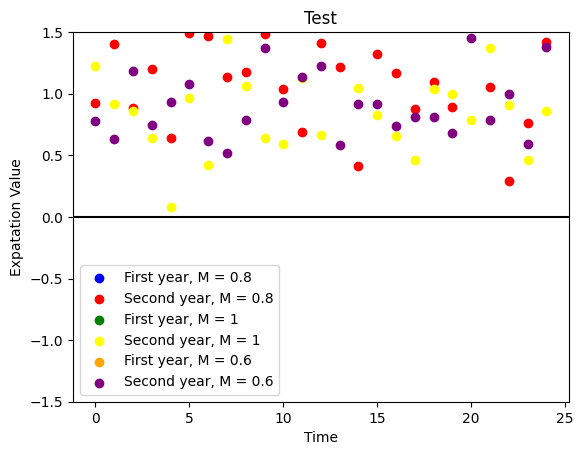

In [ ]:
plt.scatter(x_data_first_year, y_data_first_year, c='blue', marker='o', label = "First year, M = 0.8")
plt.scatter(x_data_second_year, y_data_second_year, c='red', marker='o', label = "Second year, M = 0.8")
plt.scatter(x_data_first_year_M1, y_data_first_year_M1, c='green', marker='o', label = "First year, M = 1")
plt.scatter(x_data_second_year_M1, y_data_second_year_M1, c='yellow', marker='o', label = "Second year, M = 1")
plt.scatter(x_data_first_year_M06, y_data_first_year_M06, c='orange', marker='o', label = "First year, M = 0.6")
plt.scatter(x_data_second_year_M06, y_data_second_year_M06, c='purple', marker='o', label = "Second year, M = 0.6")
plt.legend()
plt.axhline(y=0, color='black', linestyle='-')
plt.ylim(-1.5, 1.5)
plt.title('Test')
plt.xlabel('Time')
plt.ylabel('Expatation Value')
plt.show()